In [96]:
##Import all packages used
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

In [98]:
##Read in the CSV
Full_Flight_Data = pd.read_csv("/Users/isaacvalencia/Desktop/Projects/AmStat_Flight_Delays/Combined_Airline_Data.csv")

## Data Cleaning ##

In [100]:
##columns variable to pull up all columns and print the unique for each column to get a good look at the variables
columns = Full_Flight_Data.columns
for i in range(len(columns)):
    print("\nFor column titled", columns[i], "\n The Unique results: \n", Full_Flight_Data[columns[i]].unique())


For column titled Unique_ID 
 The Unique results: 
 ['FL_90_2013-01-01' 'FL_99_2013-01-01' 'FL_256_2013-01-01' ...
 'UA_2412_2017-12-31' 'VX_1305_2017-12-31' 'VX_1315_2017-12-31']

For column titled Airline 
 The Unique results: 
 ['Airtran' 'Alaska' 'American' 'AtlanticSE' 'Delta' 'Frontier' 'JetBlue'
 'Southwest' 'USAirways' 'United' 'Virgin' 'Endeavor' 'SkyWest' 'Spirit']

For column titled Carrier Code 
 The Unique results: 
 ['FL' 'AS' 'AA' 'EV' 'DL' 'F9' 'B6' 'WN' 'US' 'UA' 'VX' '9E' 'OO' 'NK']

For column titled Date (MM/DD/YYYY) 
 The Unique results: 
 ['2013-01-01' '2013-01-02' '2013-01-03' ... '2017-12-29' '2017-12-30'
 '2017-12-31']

For column titled Flight Number 
 The Unique results: 
 [  90   99  256 ... 6964 3015 3529]

For column titled Tail Number 
 The Unique results: 
 ['N949AT' 'N944AT' 'N893AT' ... 'N855NW' 'N8556Z' 'N886DN']

For column titled Destination Airport 
 The Unique results: 
 ['BWI' 'FNT' 'DTW' 'ATL' 'BOS' 'BUF' 'CAK' 'DAY' 'DCA' 'GRR' 'IND' 'MDW'
 'M

**Problem** For Column "Scheduled elapsed time (Minutes)" we have results of 0, should we have this? If we have a scheduled time of 0 munites is it a type or is this a system to change gates? The column is under a data type of float so we will run a test to see the frequency of 0 occuring. 

In [102]:
##To see how many 0 are in each of the columns
print("Amount of times Flight data is 0 for Scheduled elapsed time (Minutes) column \n", Full_Flight_Data["Scheduled elapsed time (Minutes)"].eq(0).sum(),
      "\nAmount of times Flight data is 0 for Actual elapsed time (Minutes) column \n", Full_Flight_Data["Actual elapsed time (Minutes)"].eq(0).sum())
Amount_Act_0 = Full_Flight_Data["Actual elapsed time (Minutes)"].eq(0).sum()

Amount of times Flight data is 0 for Scheduled elapsed time (Minutes) column 
 2 
Amount of times Flight data is 0 for Actual elapsed time (Minutes) column 
 8792


In [104]:
#First look at the two Scheduled 0's to see their index
Full_Flight_Data[Full_Flight_Data["Scheduled elapsed time (Minutes)"] == 0]

,Unique_ID,Airline,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Destination Airport,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),...,WT02,WT03,WT05,WT08,WT10,WT11,WT13,WT14,WT16,WT21
268357,NK_324_2015-05-09,Spirit,NK,2015-05-09,324,N620NK,ACY,21:30,21:52,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
424276,NK_878_2016-08-12,Spirit,NK,2016-08-12,878,N624NK,LBE,15:53,15:50,0.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
##Found that both Scheduled and Actual times are both 0
Full_Flight_Data.loc[[268357, 424276] , [columns[7], columns[8], columns[11], columns[9], columns[10]]]

,Scheduled departure time,Actual departure time,Departure delay (Minutes),Scheduled elapsed time (Minutes),Actual elapsed time (Minutes)
268357,21:30,21:52,22.0,0.0,0.0
424276,15:53,15:50,-3.0,0.0,0.0


**Conclusion 1** This seems like an error, in which we can remove the variables or assign them the mean of the other values, keeping the 0's will skew data related to those two positions.

In [111]:
Perc_of_0 = Amount_Act_0/Full_Flight_Data.shape[0]
print("The percent of flights with an actual elapsed time of", Perc_of_0)

The percent of flights with an actual elapsed time of 0.014603583791217917


In [113]:
##Copy made for editing
Full_copy = Full_Flight_Data

In [115]:
##Create two groups to visualze minutes = 0 and drop a row that elongated the charts
Full_copy['Value_Category'] = Full_copy['Actual elapsed time (Minutes)'].apply(lambda x: '0' if x == 0 else 'Non-0')
Full_copy = Full_copy.drop(index = 590688)

Charts for Visualization

<Axes: xlabel='Value_Category', ylabel='Departure delay (Minutes)'>

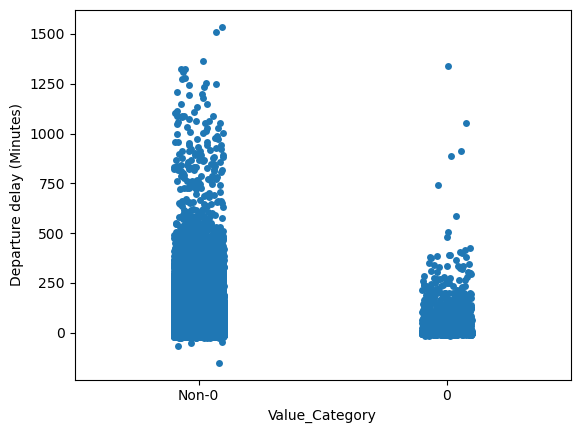

In [118]:
sns.stripplot(x='Value_Category', y='Departure delay (Minutes)', data=Full_copy)

<Axes: xlabel='Value_Category', ylabel='Departure delay (Minutes)'>

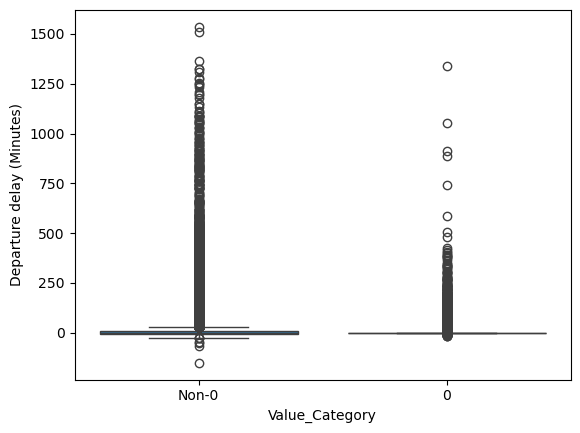

In [119]:
sns.boxplot(x='Value_Category', y='Departure delay (Minutes)', data=Full_copy)

In [120]:
#Remove variable to make comparison plots
Full_Flight_Data.drop(['Value_Category'], axis=1, inplace=True)

**Conclusion 2** We can see here that we have a very clear similarity in distribution, while these 0's make up only 1% of the values, they are still distributed similarly to the rest of the values. What conclusions can be made? This happening 1% of the time may or may not be error, could 0 be canceled flights? The delay time would stop tracking when the flight gets canceled?

## Data Cleaning ##

In [146]:
##Turn all NA in the weather variables into 0's
weather_variables = Full_Flight_Data.iloc[:, -12:]
Full_Flight_Data.iloc[:, -12:] = weather_variables.fillna(0)

In [148]:
Full_Flight_Data['WT03'].unique()

array([0., 1.])

## EDA ##

In [151]:
Full_Flight_Data_numeric = Full_Flight_Data.drop(['Unique_ID', 'Airline','Carrier Code','Date (MM/DD/YYYY)','Tail Number','Destination Airport','Scheduled departure time','Actual departure time'], axis=1)
Full_Flight_Data_numeric.dtypes
Numeric_columns = Full_Flight_Data_numeric.columns

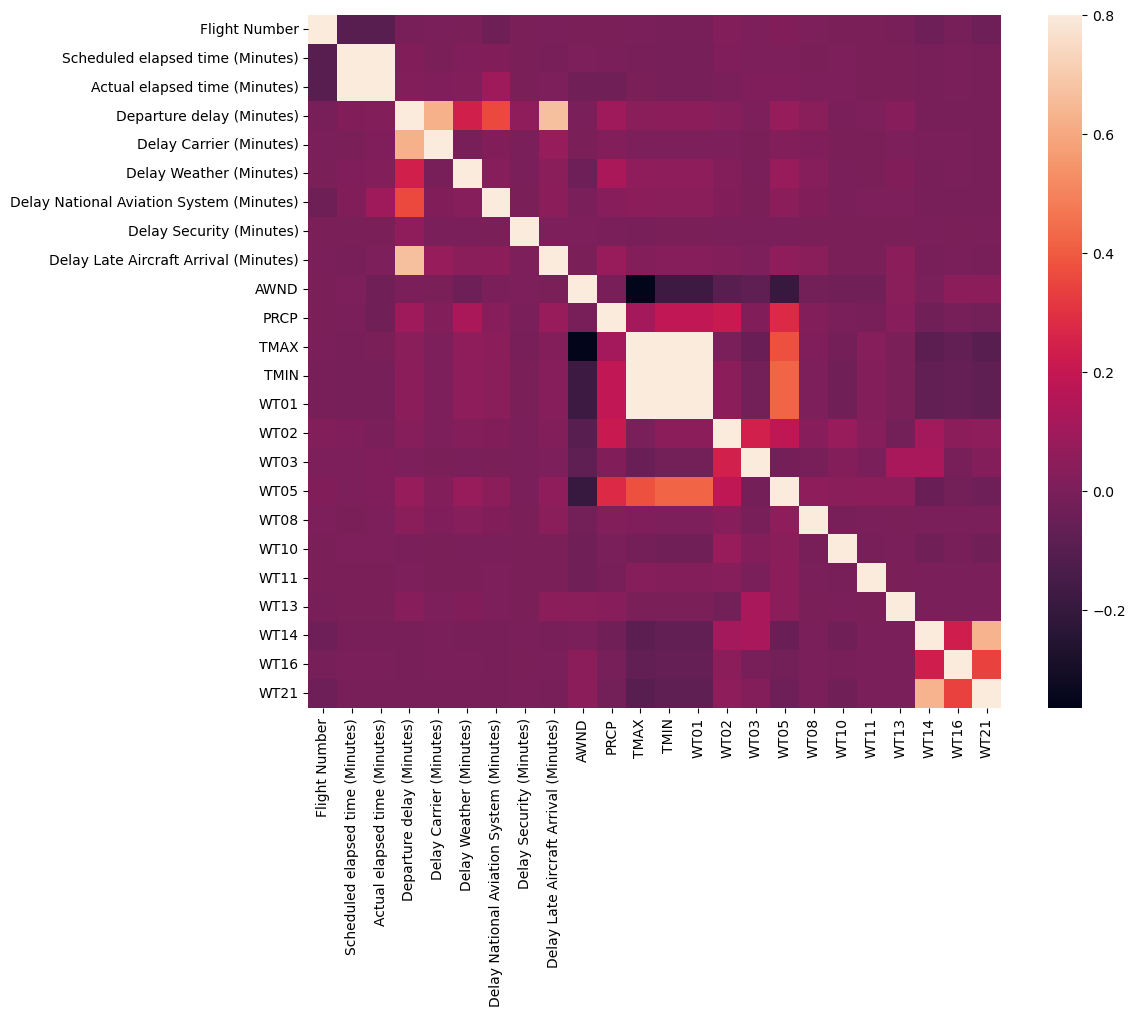

In [153]:
corrmat = Full_Flight_Data_numeric.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

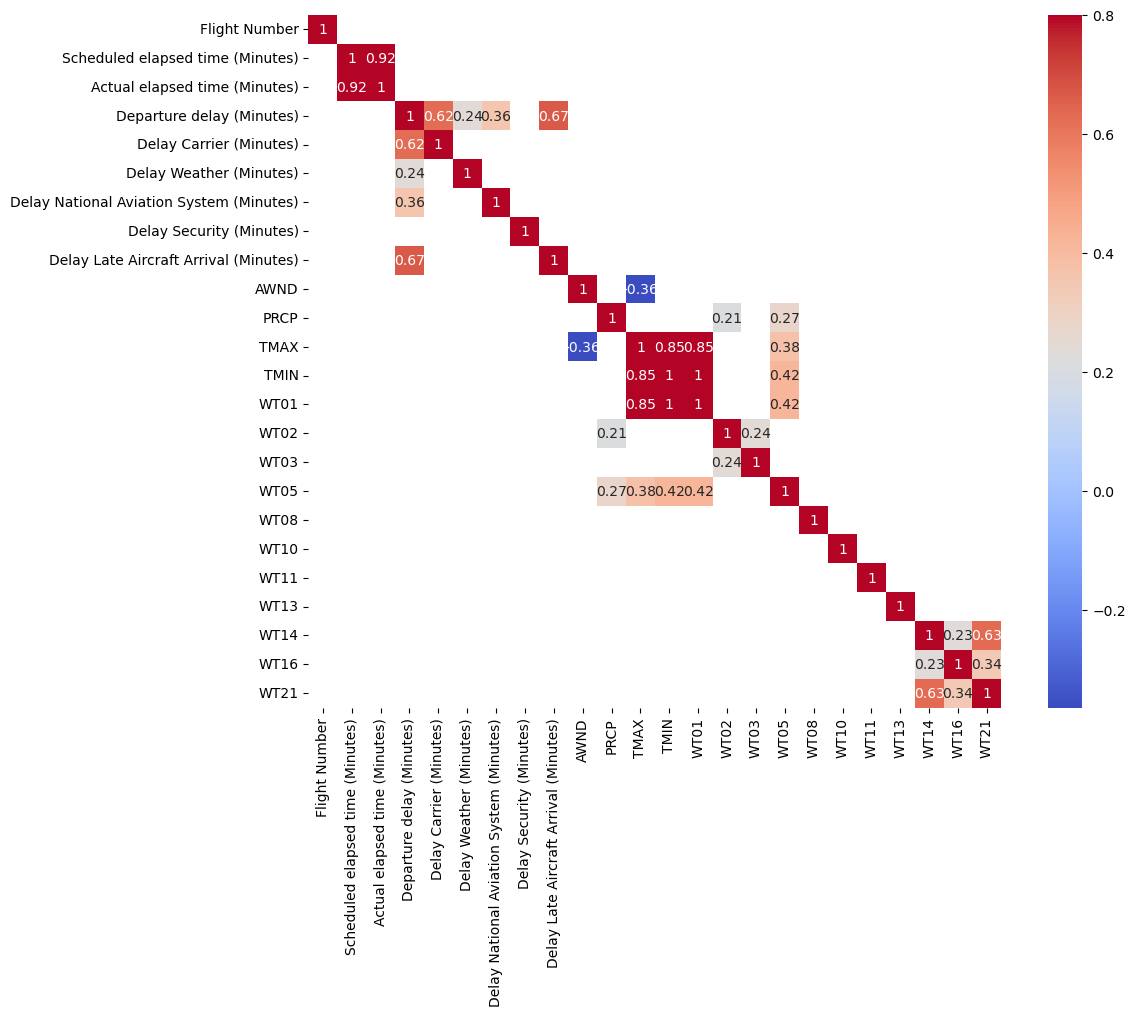

In [154]:
##Correlation for greater than 0.2
corrmat = Full_Flight_Data_numeric.corr()
mask = corrmat.abs() < 0.2
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, mask=mask, vmax=.8, square=True, annot=True, cmap="coolwarm")
plt.show()


**Correlation Matrix**
We are able to make a few observations from the Correlation Matrix.  

**1)** We can see a strong correlation between Schedules and Actual Eclipsed Flight time, this gauges something out of the scope of our reserach question, and I can see up using neither features in a final model. For the time being I will ignore those variables.
  
**2)** We see a stronger correlation between Delay and specific Delay types, which we know for sure is colinearity because we have a predesigned section of delay in the variable. But are we going to treat these variables differently? Should we apply transformations?

**3)** We have a few weather variables that have correlations, the is most definitly possibility of colinearity in these varaibles because we drew from two different sources, I will outline the most important to look at:
* WTO5 compared to TMIN and WT01
* AWND compared TMAX 
* TMAX and TMIN and WT01
* WT16 and WT14 and WT21

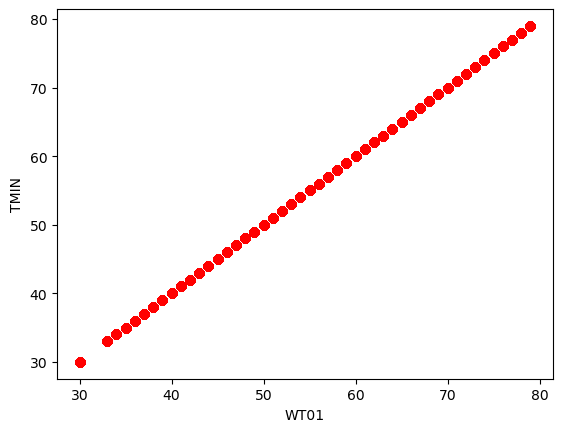

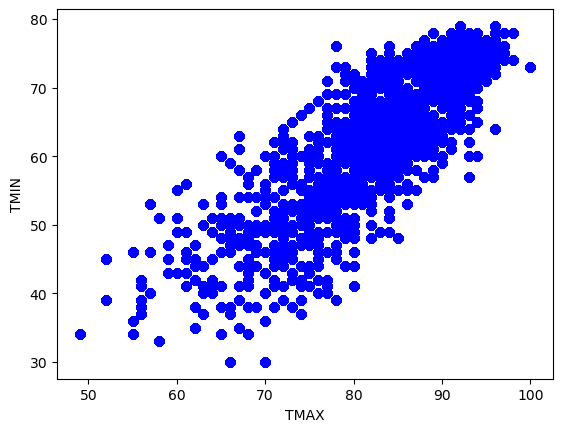

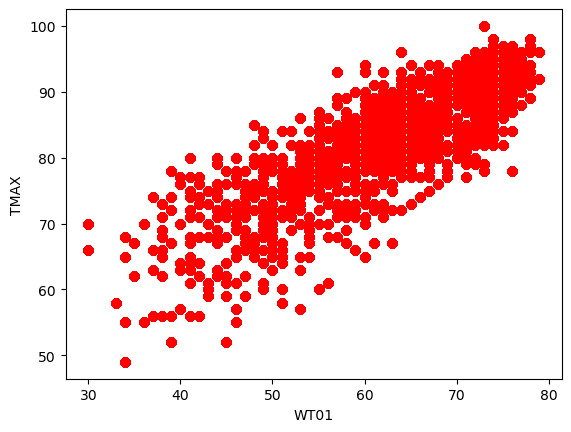

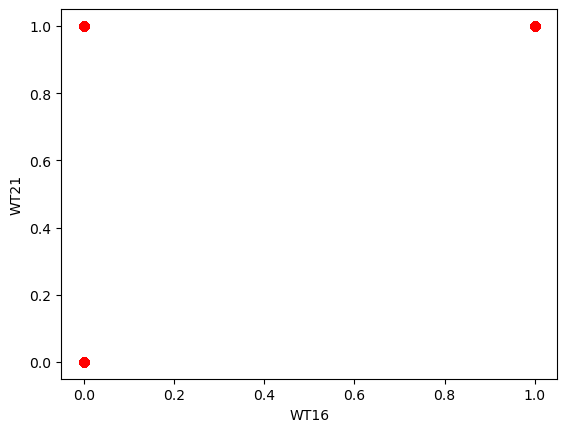

In [165]:
##Looking at plots for the highest
plt.scatter(Full_Flight_Data_numeric['WT01'], Full_Flight_Data_numeric['TMIN'], color='red')
plt.xlabel('WT01')
plt.ylabel('TMIN')
plt.show()
plt.scatter(Full_Flight_Data_numeric['TMAX'], Full_Flight_Data_numeric['TMIN'], color='blue')
plt.xlabel('TMAX')
plt.ylabel('TMIN')
plt.show()
plt.scatter(Full_Flight_Data_numeric['WT01'], Full_Flight_Data_numeric['TMAX'], color='red')
plt.xlabel('WT01')
plt.ylabel('TMAX')
plt.show()
plt.scatter(Full_Flight_Data_numeric['WT16'], Full_Flight_Data_numeric['WT21'], color='red')
plt.xlabel('WT16')
plt.ylabel('WT21')
plt.show()

Remove one of TMIN and WTO1

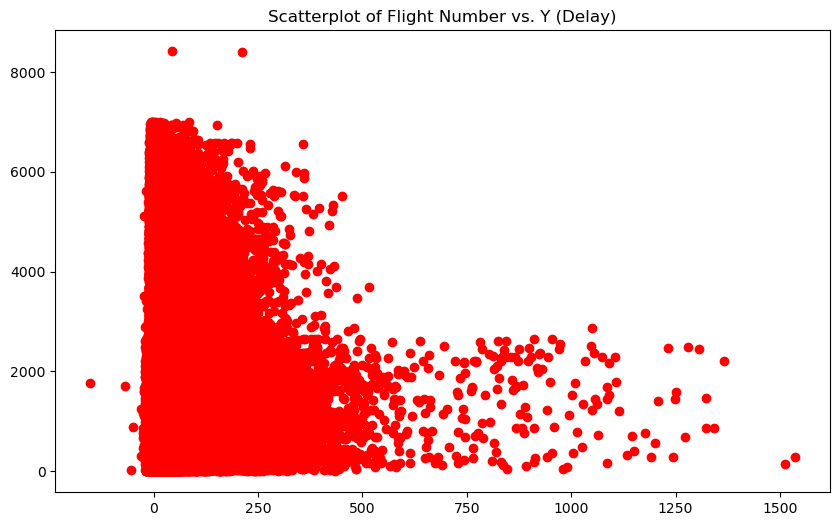

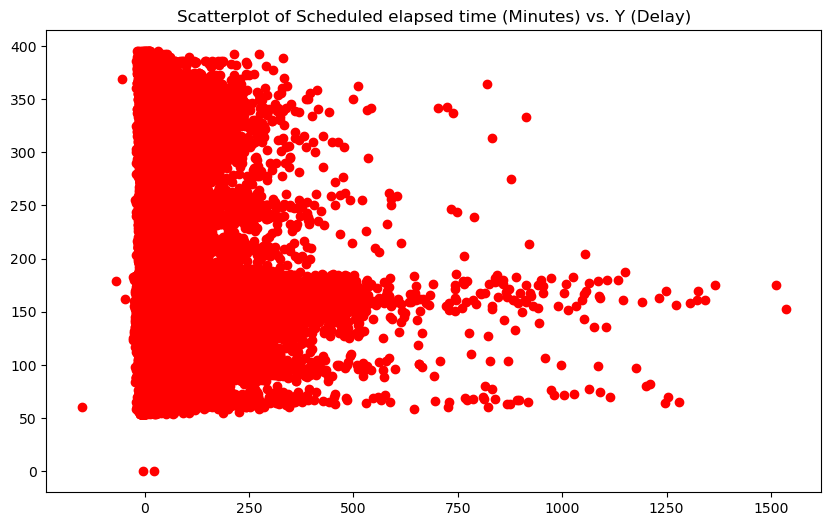

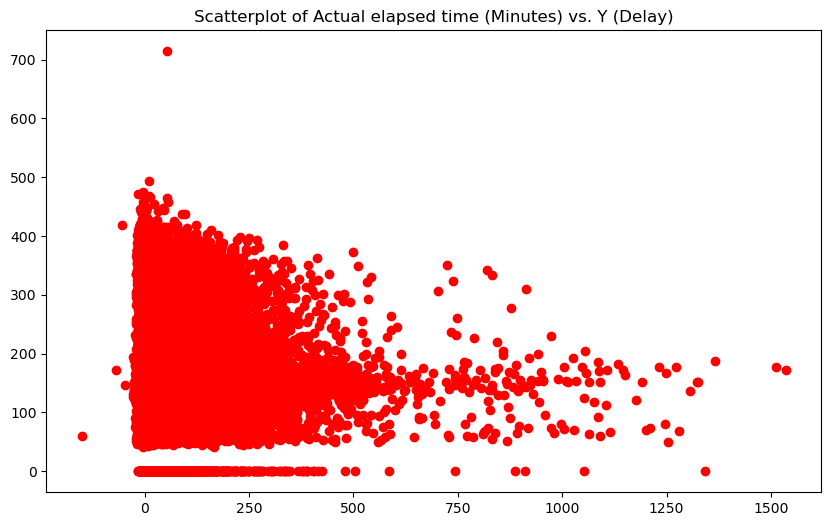

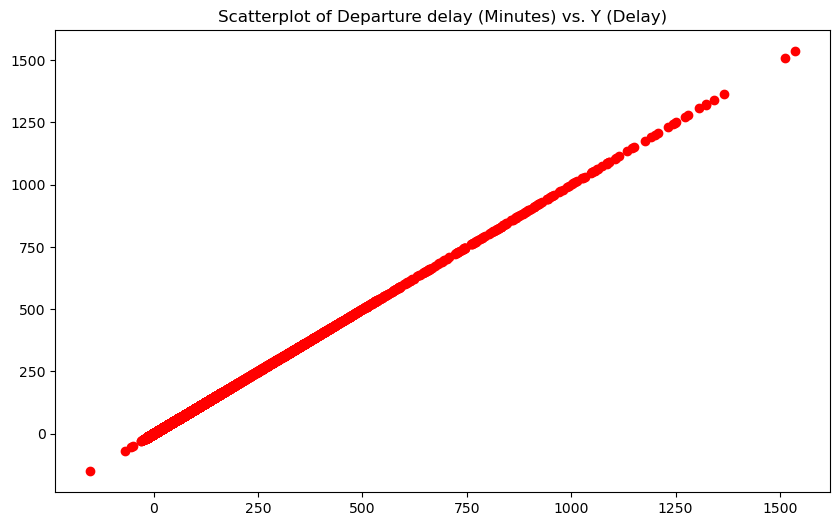

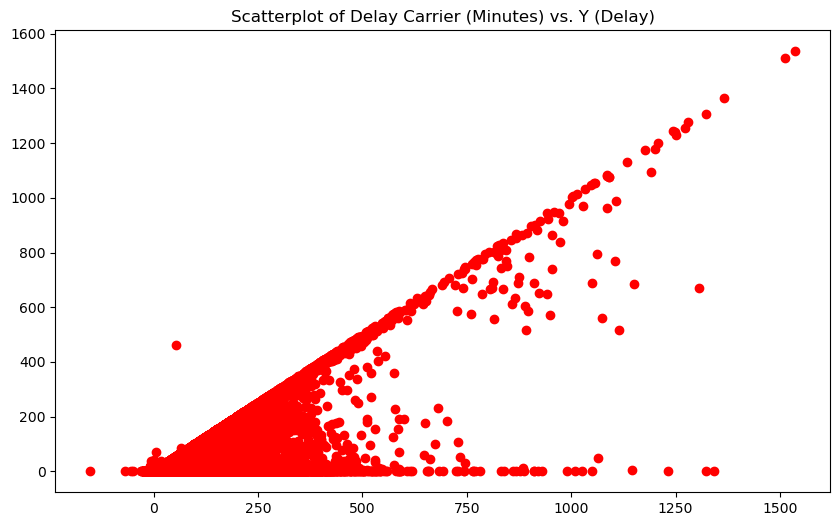

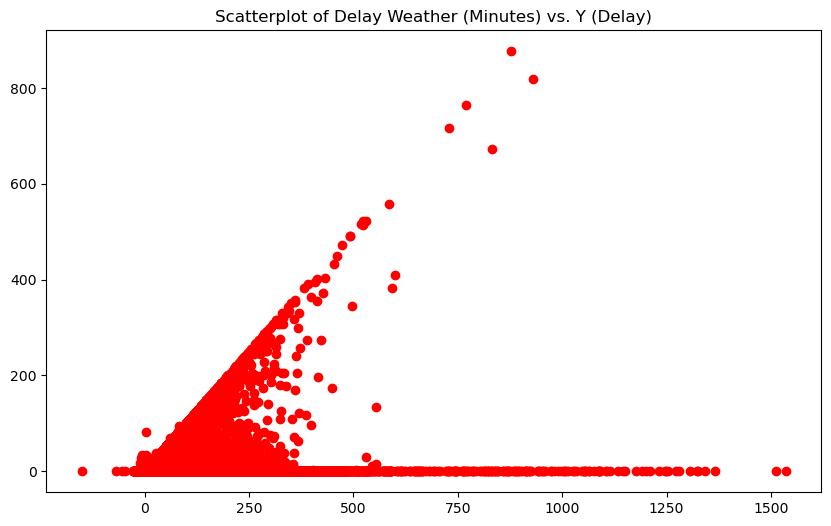

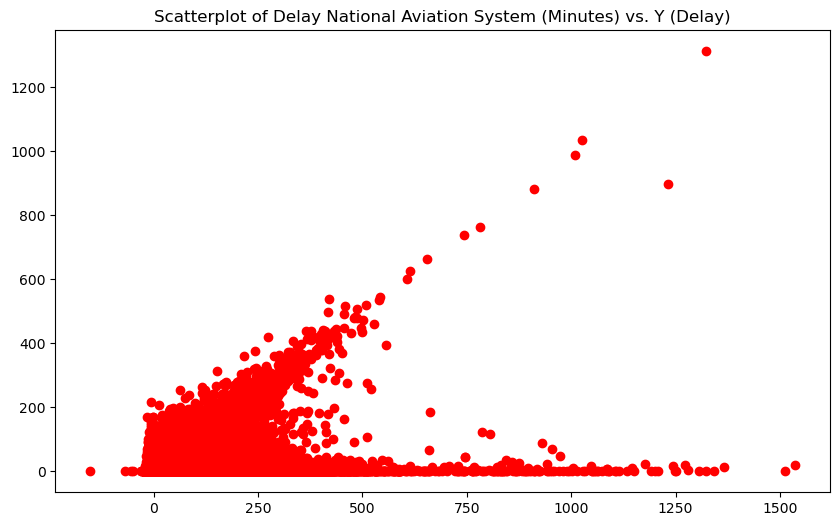

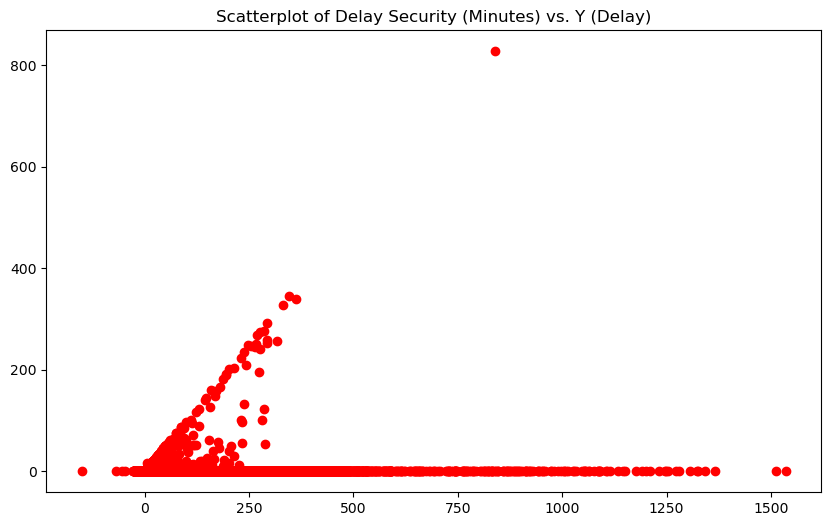

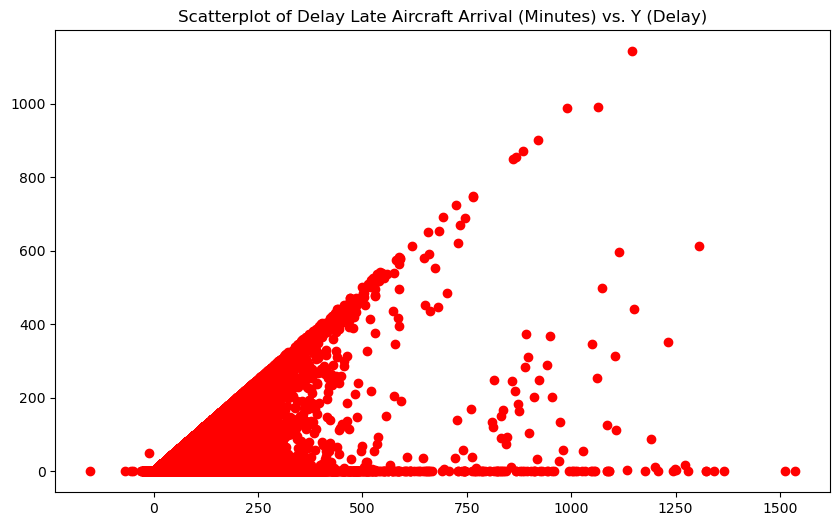

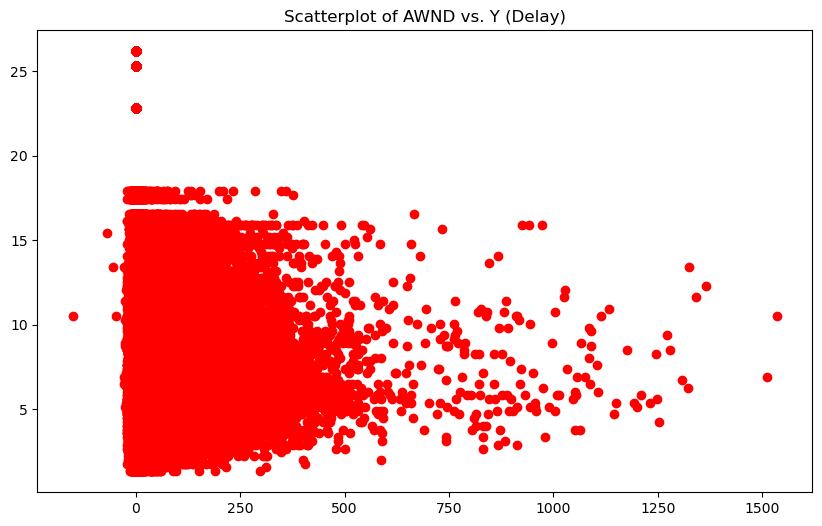

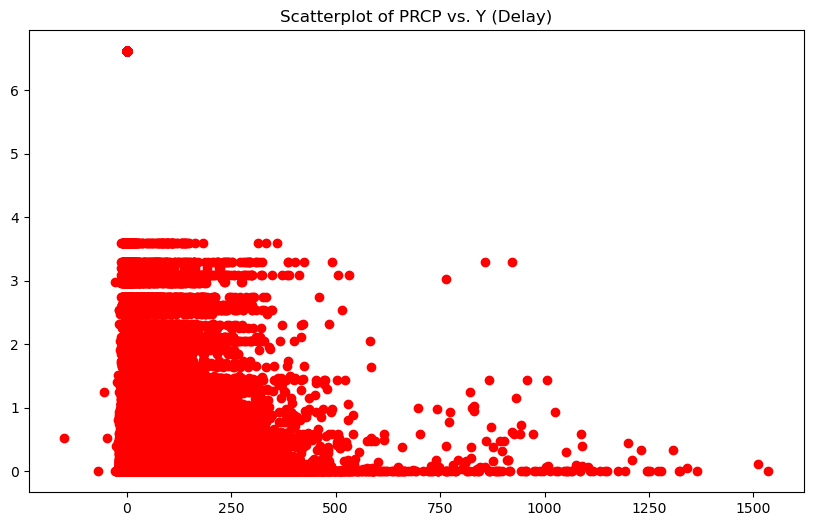

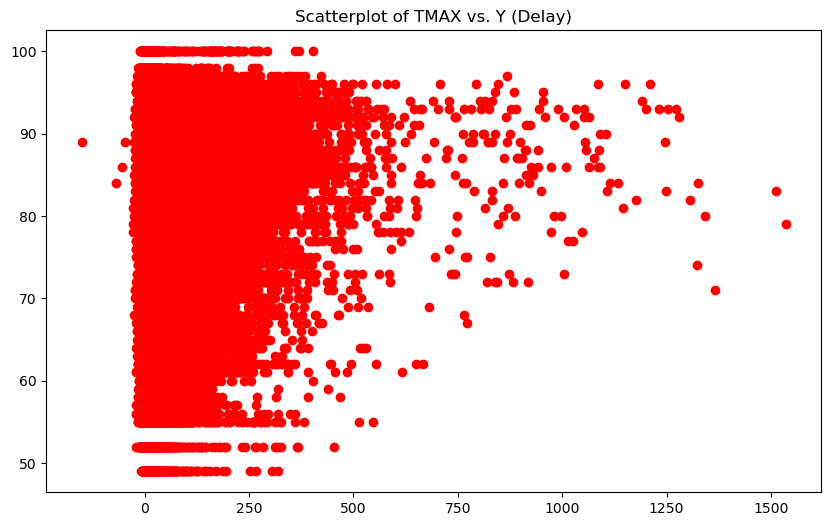

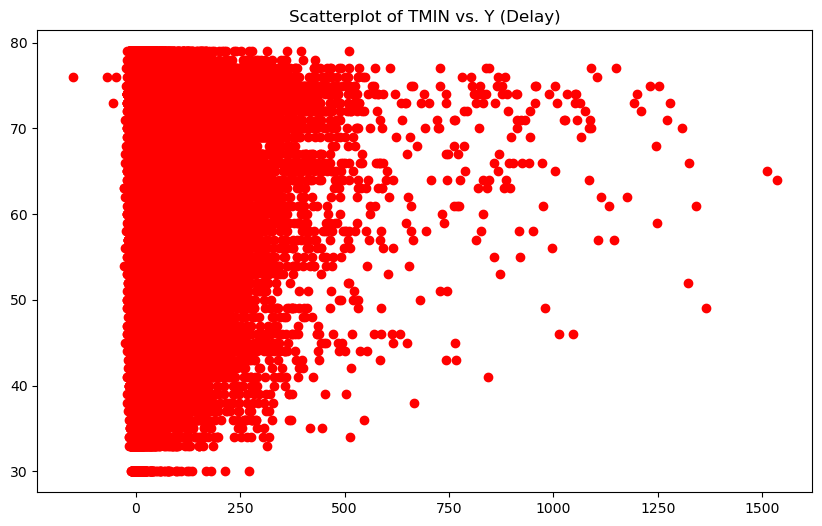

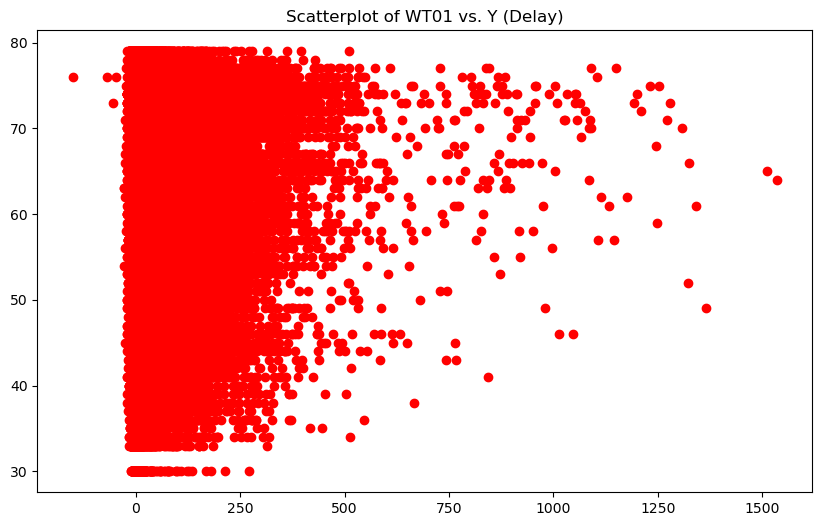

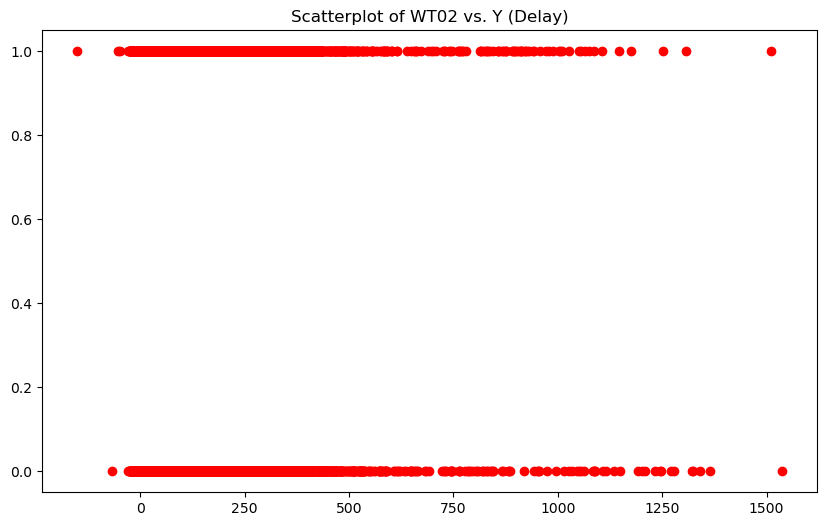

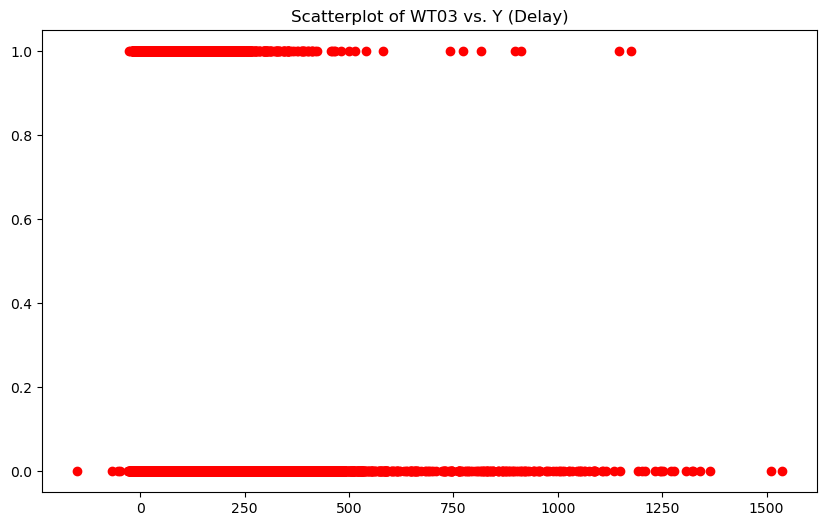

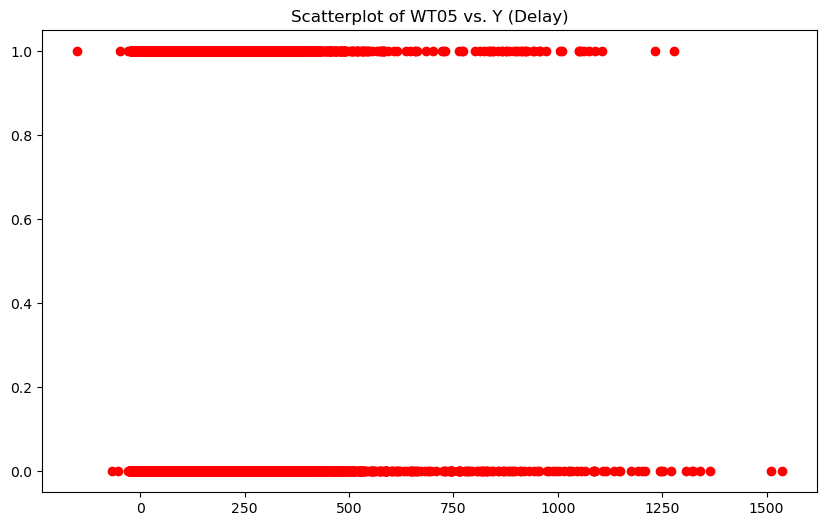

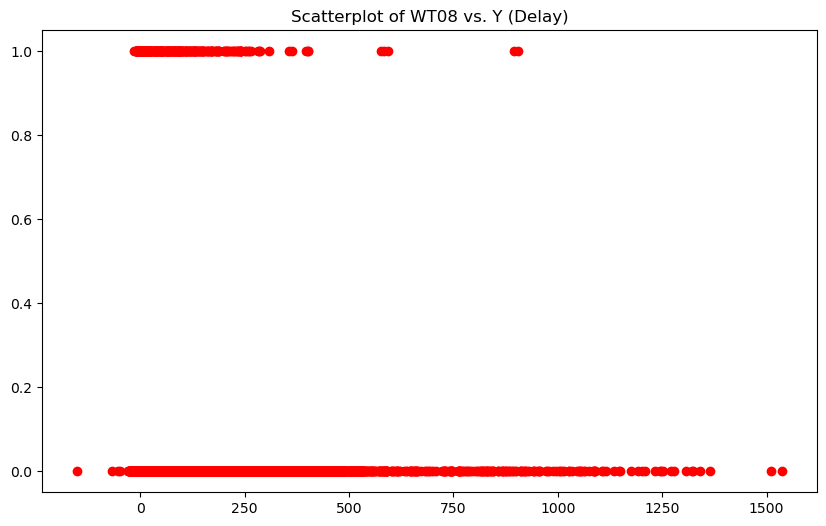

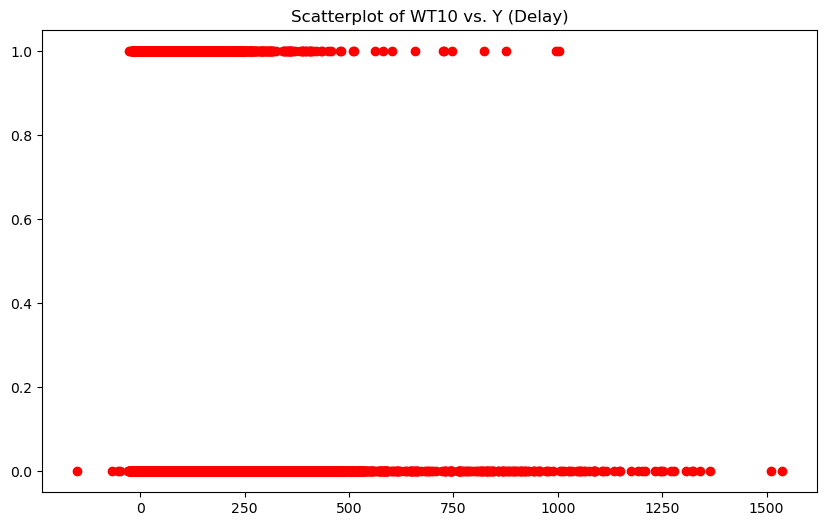

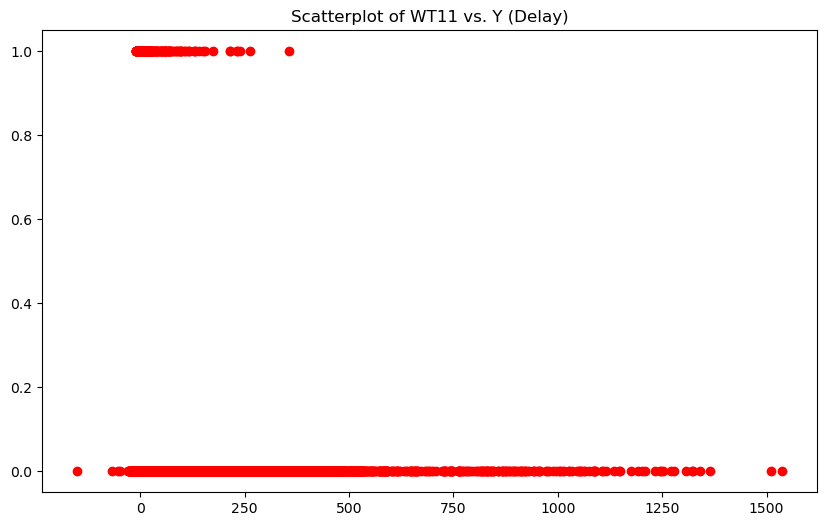

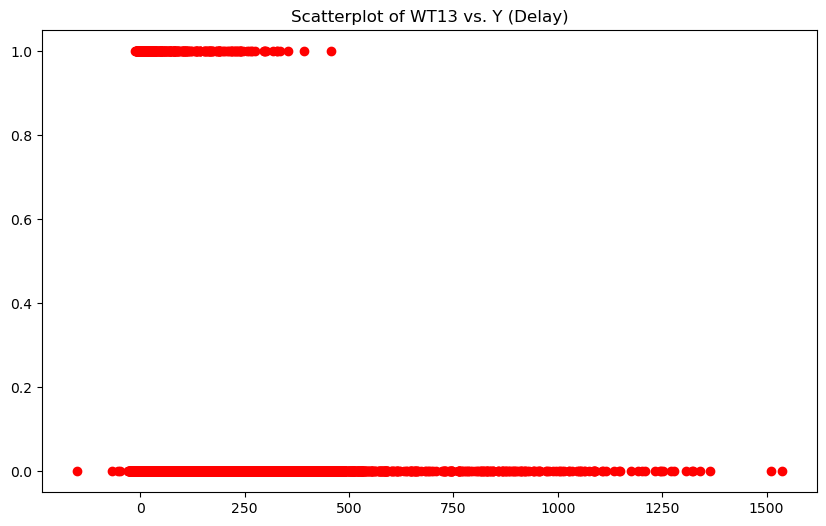

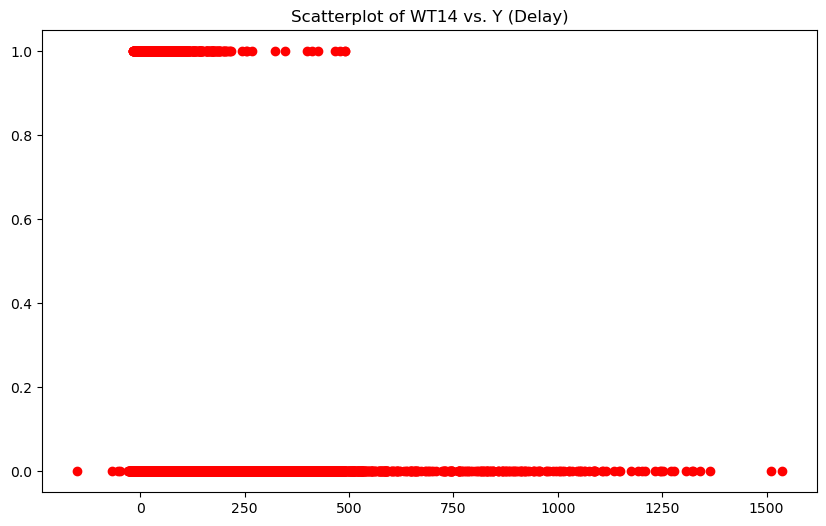

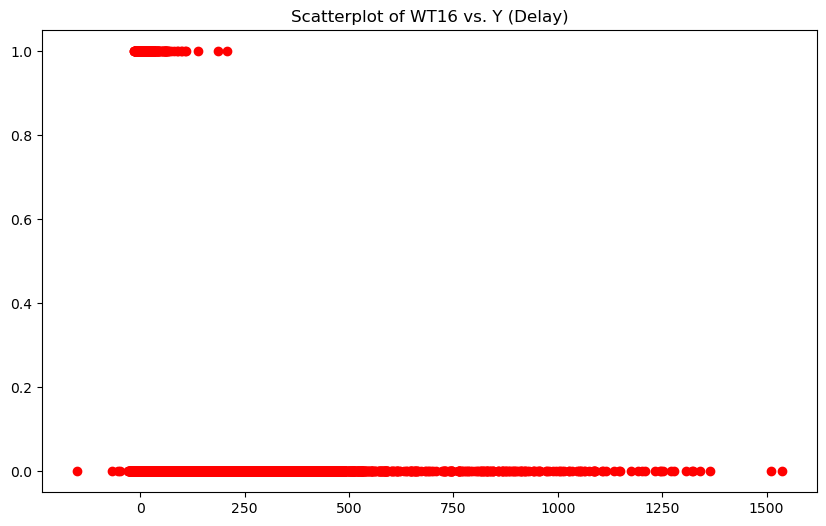

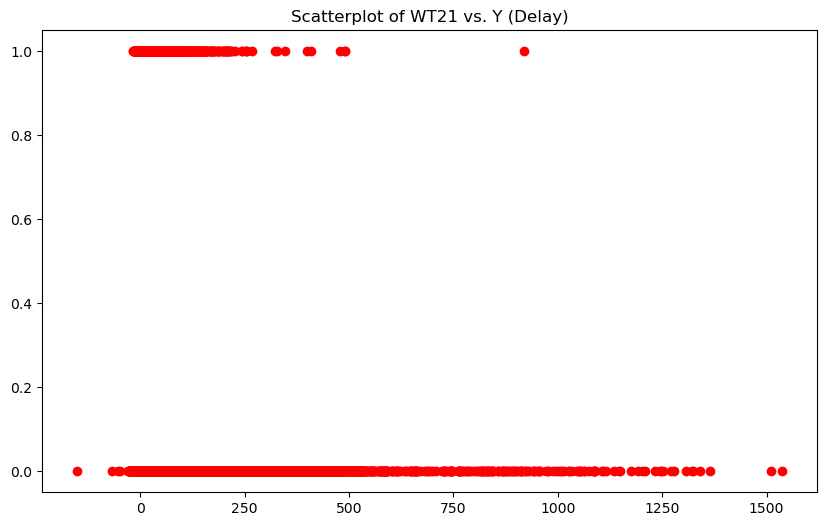

In [144]:
##Initial Scatterplots to look at the distribution
for i in range(len(Numeric_columns)):
    plt.figure(figsize=(10, 6))
    plt.scatter(Full_Flight_Data_numeric['Departure delay (Minutes)'], Full_Flight_Data_numeric[Numeric_columns[i]], color='red')
    plt.title(f'Scatterplot of {Numeric_columns[i]} vs. Y (Delay)')
    plt.show()

With these scatterplots we can see there are many assumptions of linearality that are broken and points us away from a regression problem

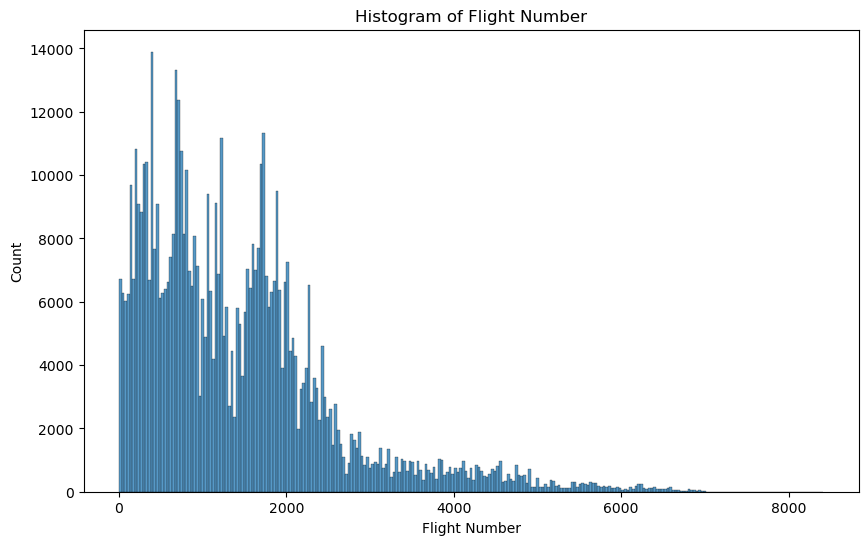

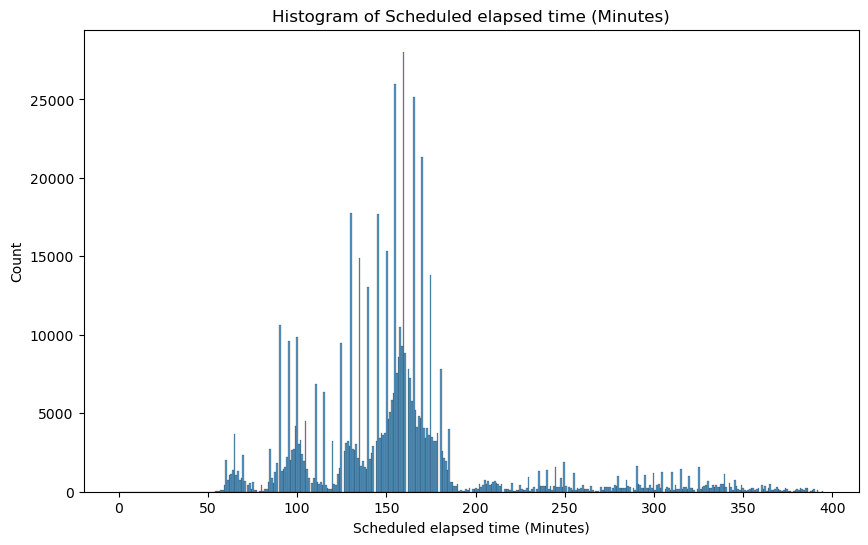

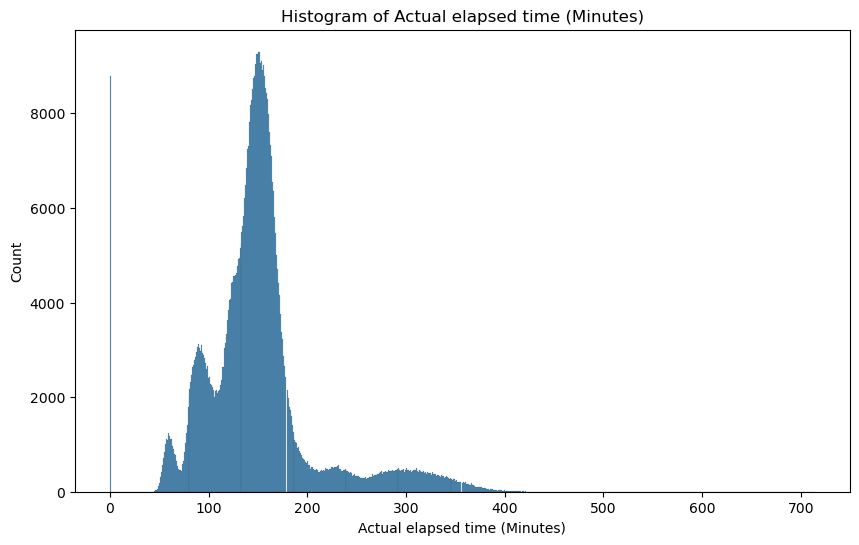

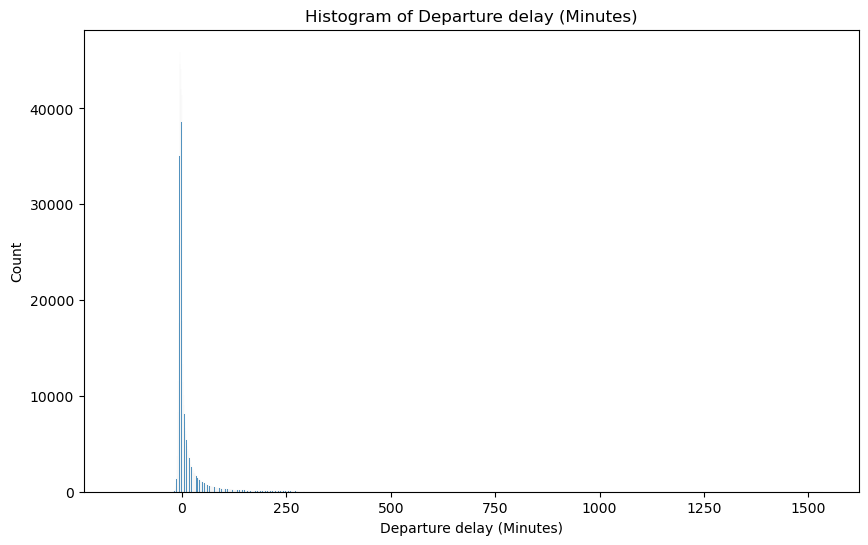

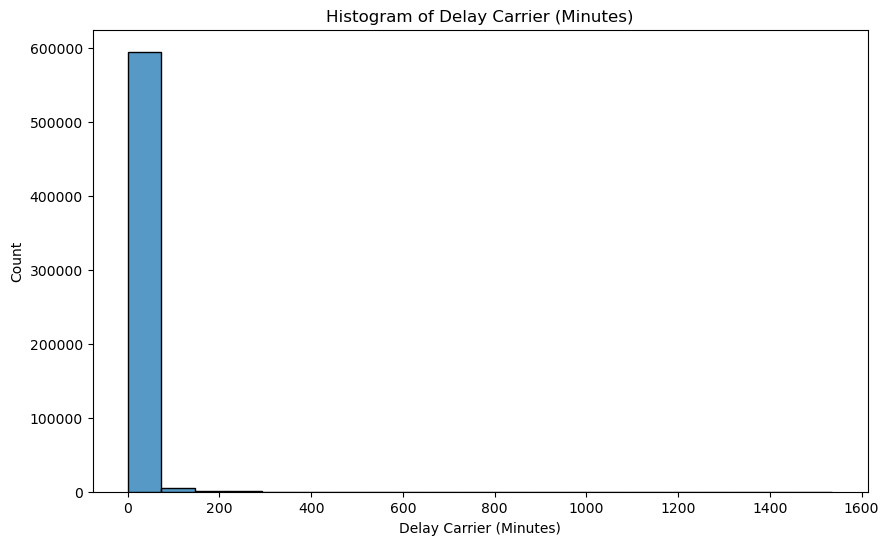

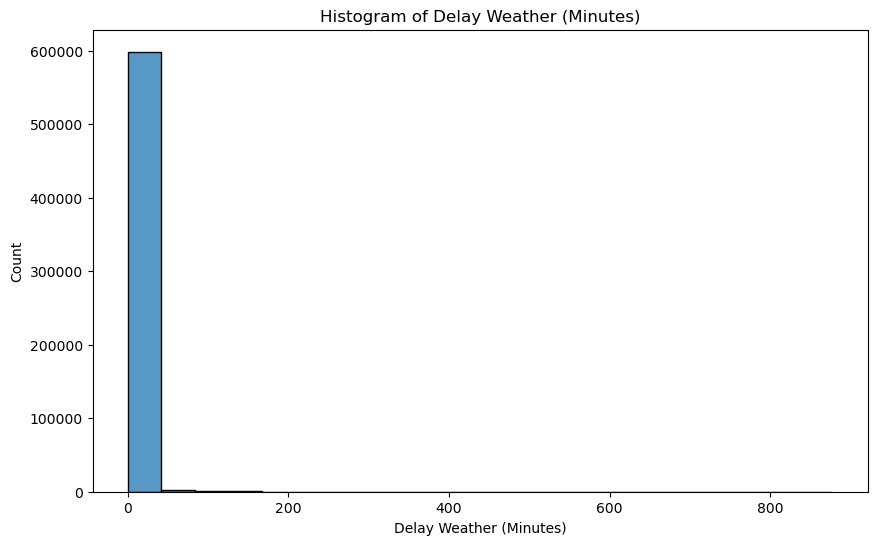

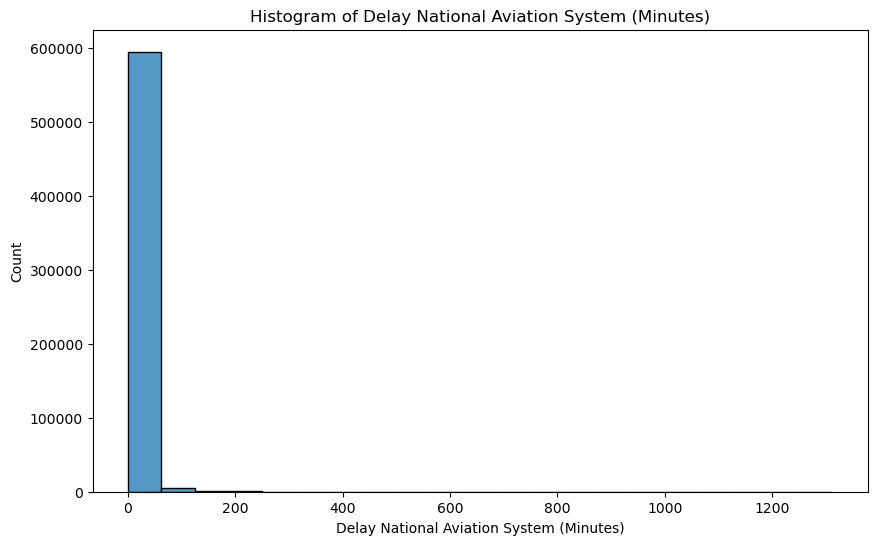

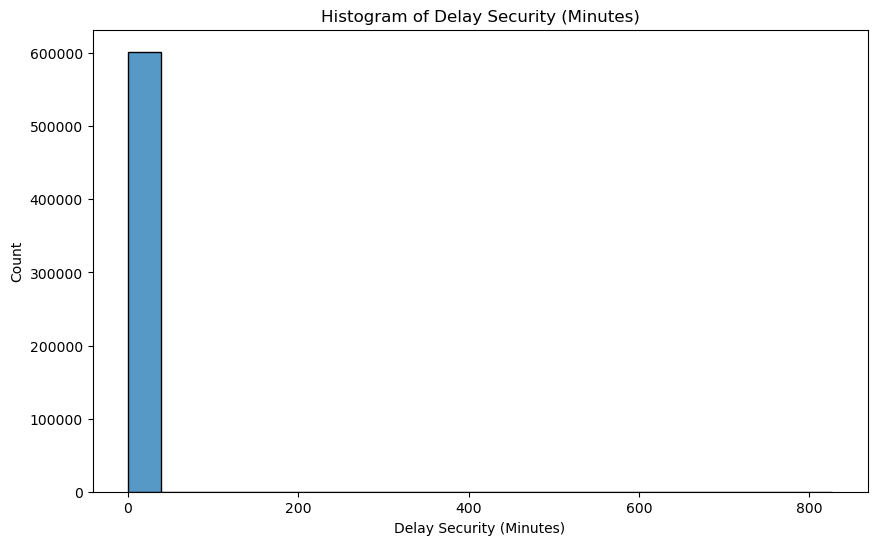

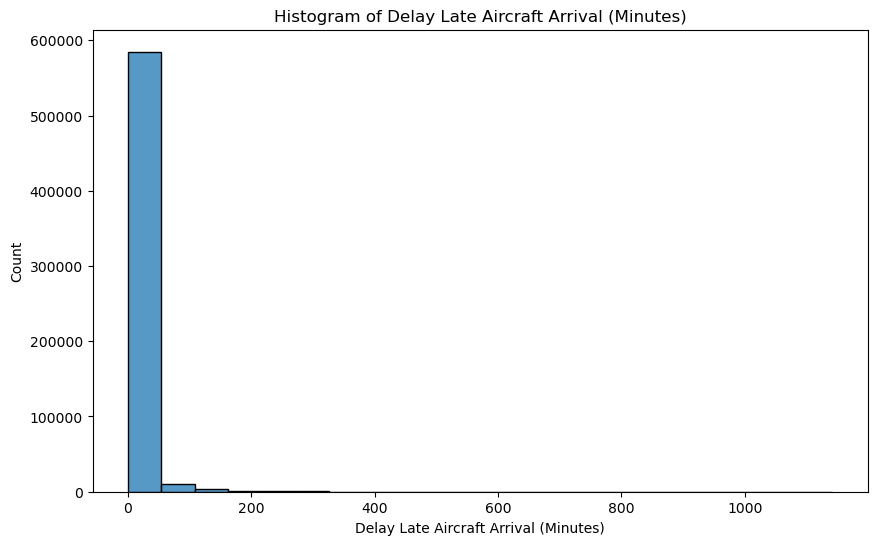

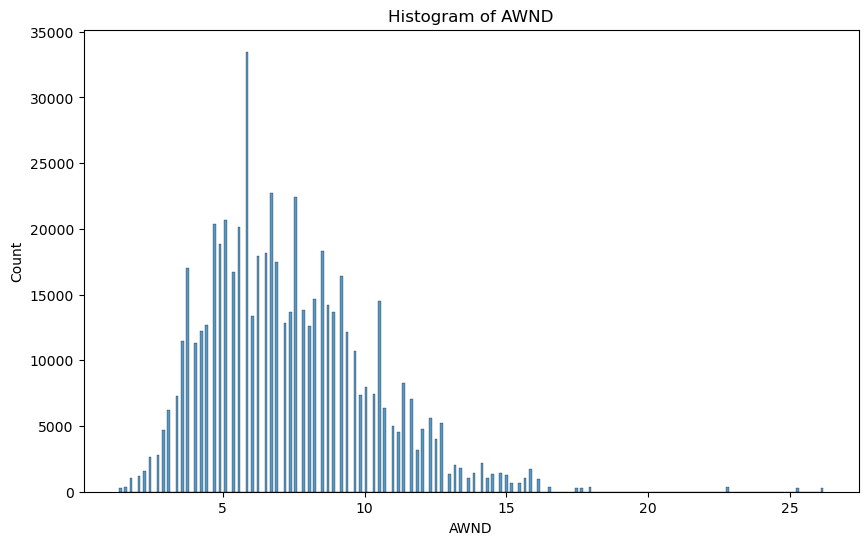

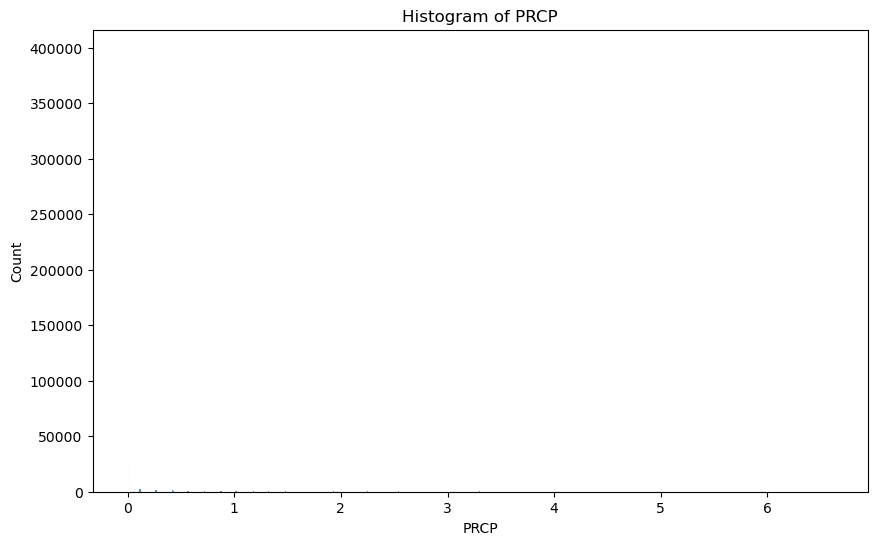

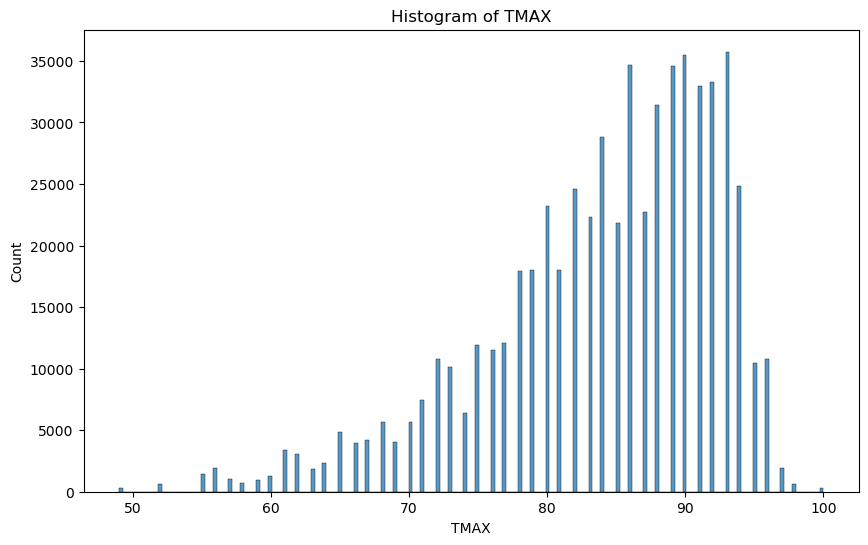

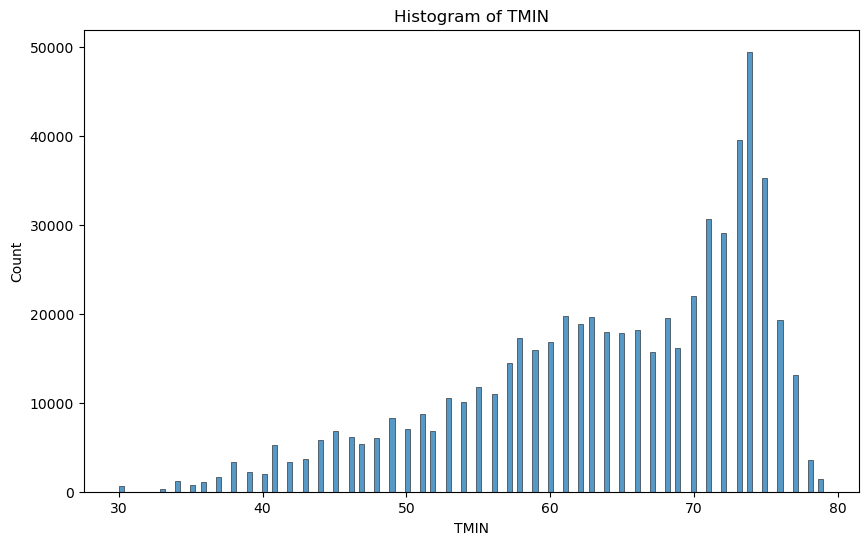

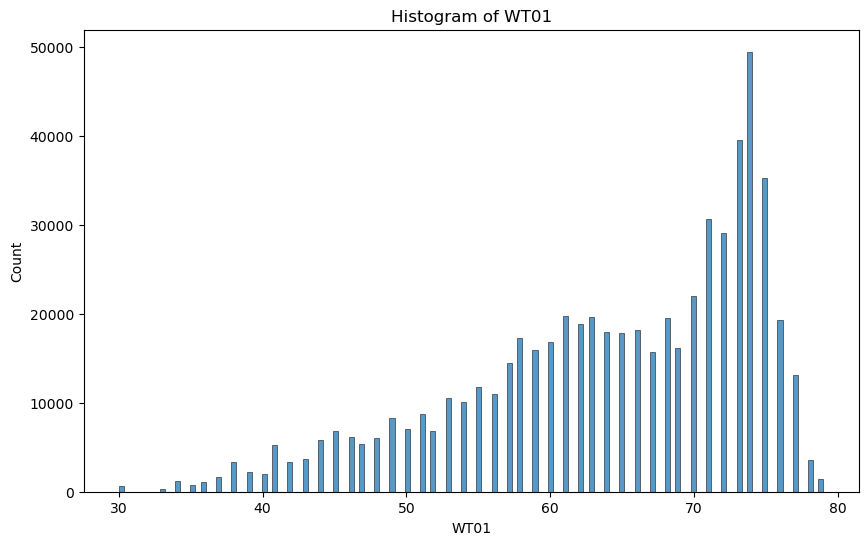

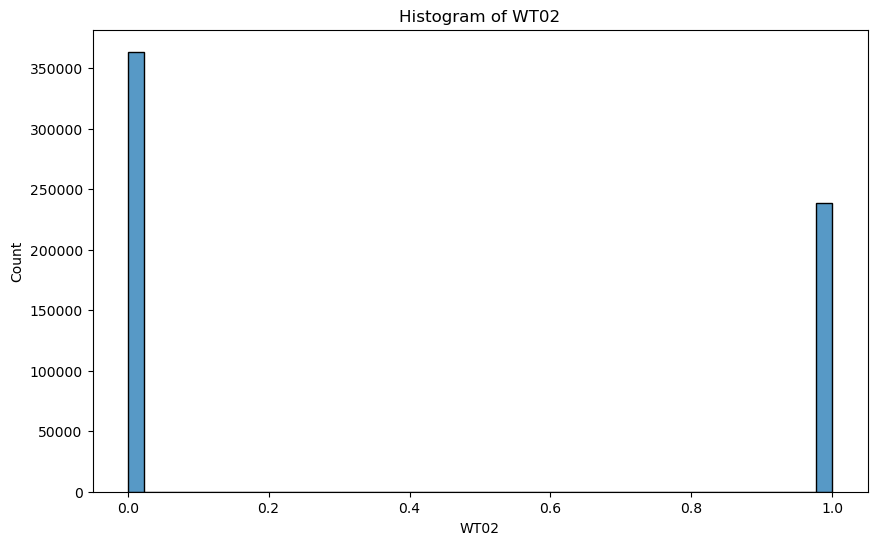

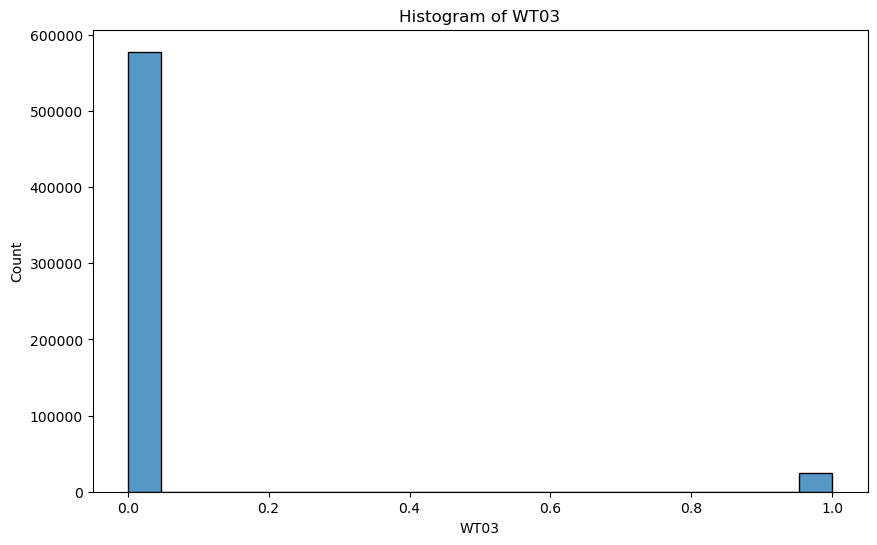

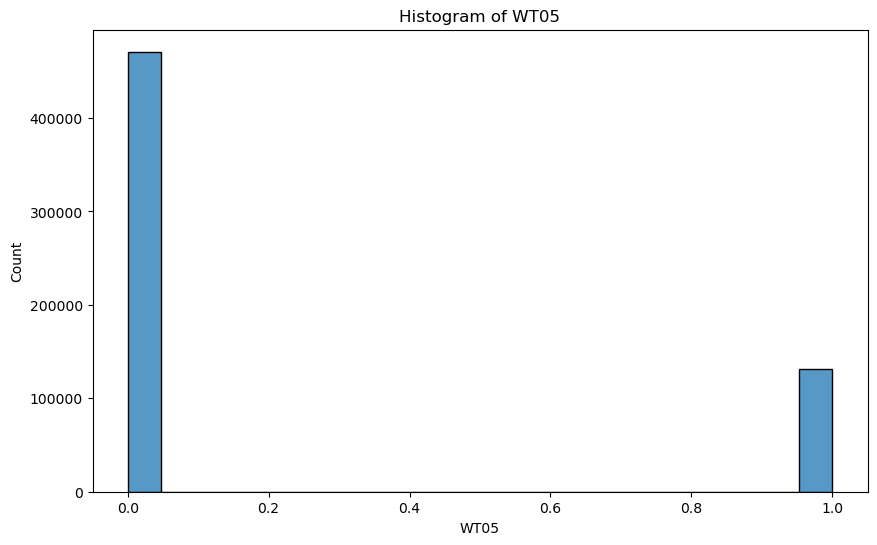

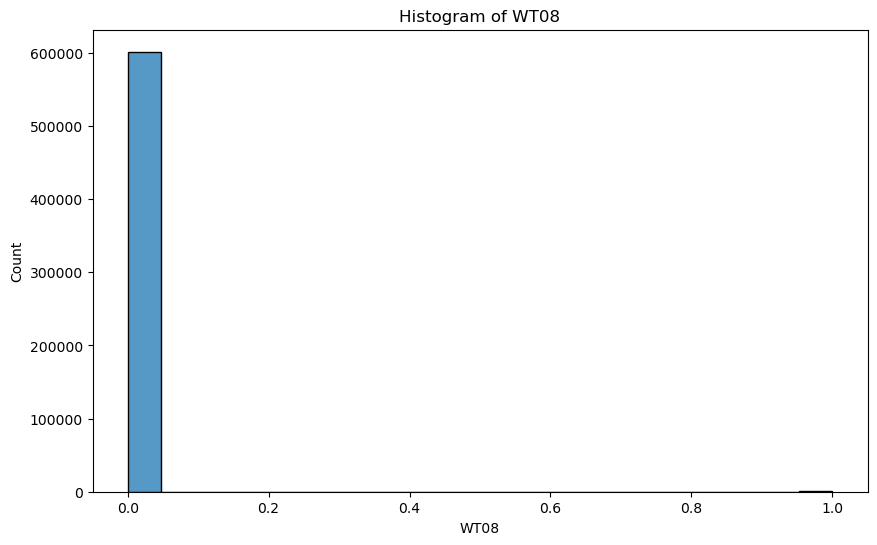

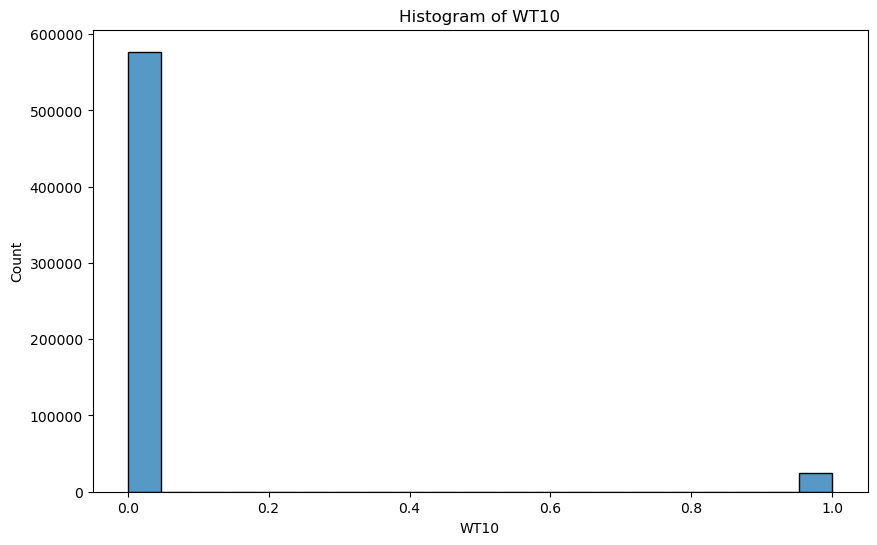

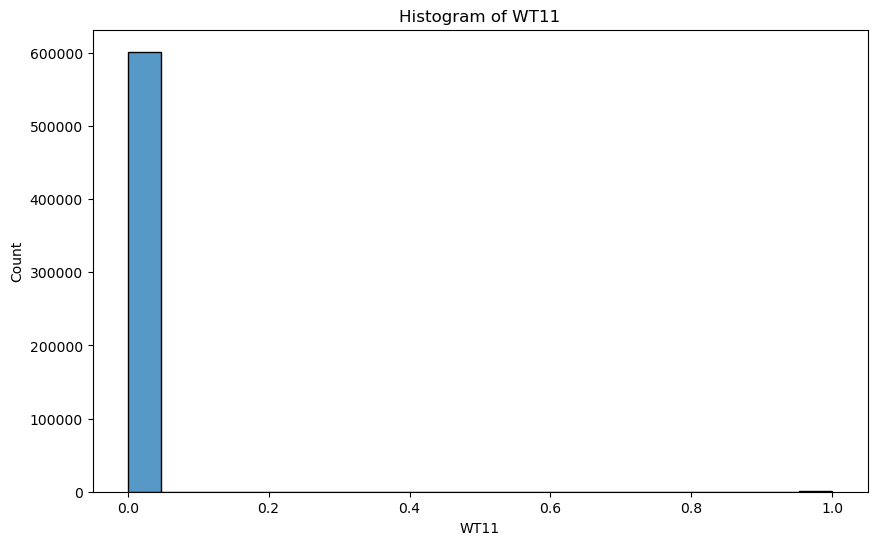

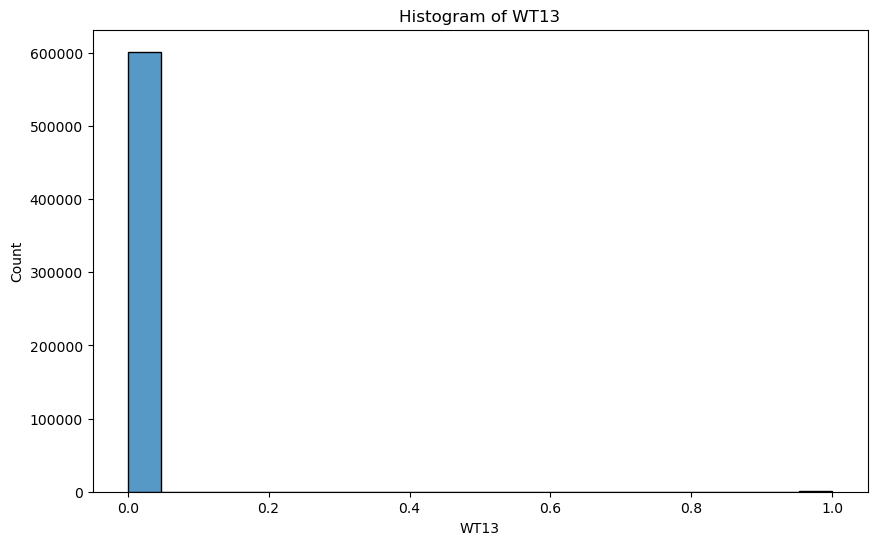

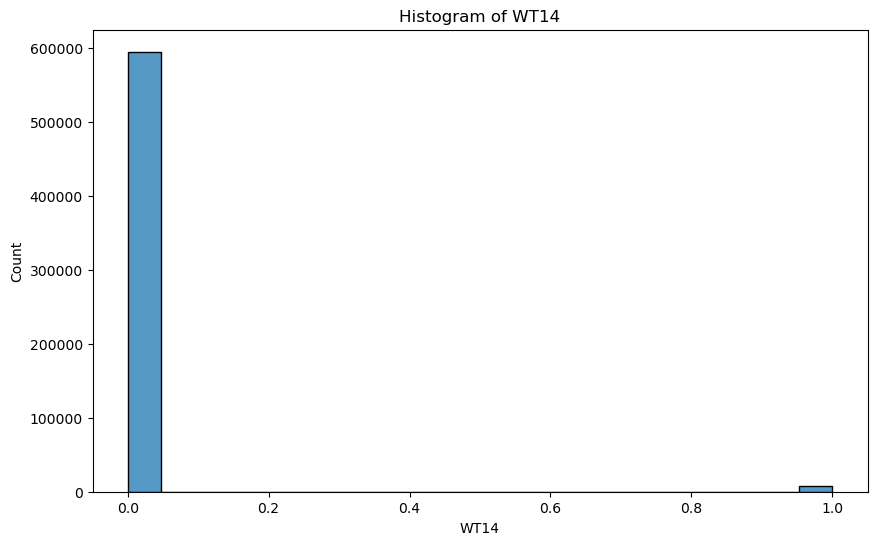

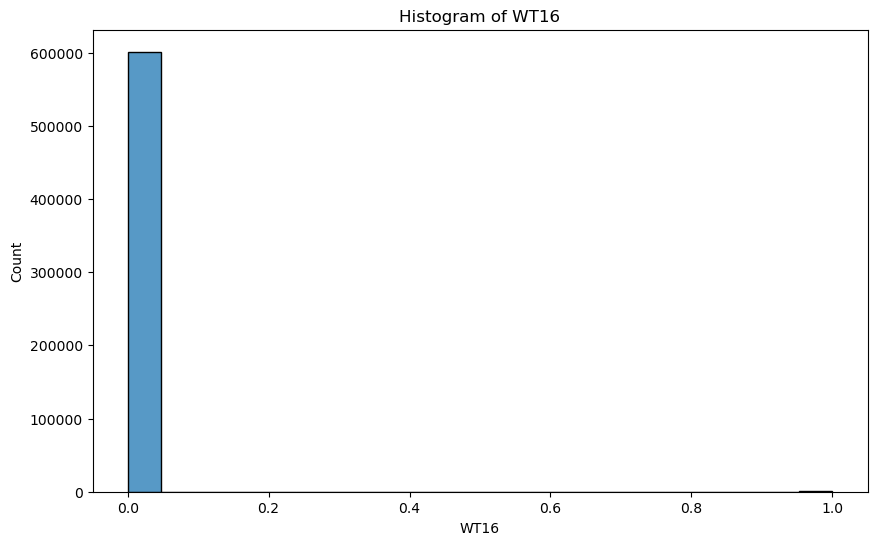

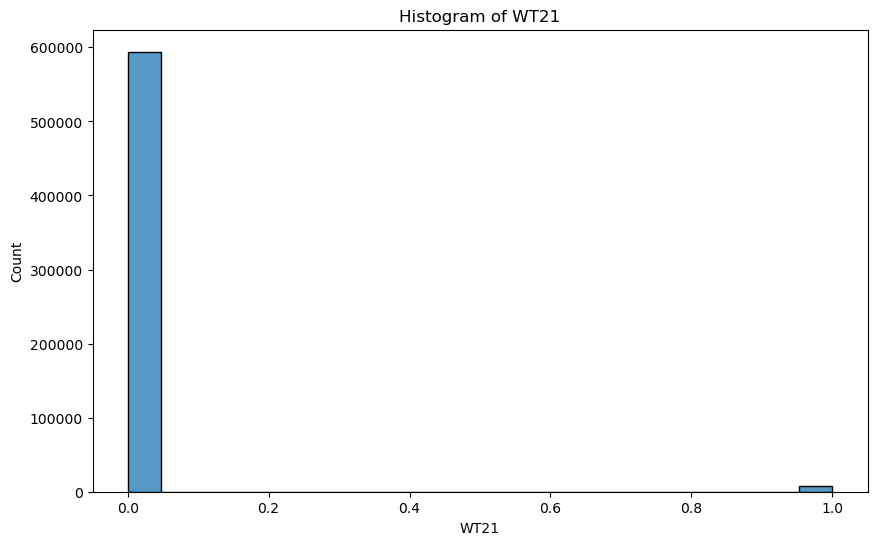

In [84]:
##Initial Histograms to look at the distribution
for i in range(len(Numeric_columns)):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=Full_Flight_Data, x=Numeric_columns[i])
    plt.title(f'Histogram of {Numeric_columns[i]}')
    plt.show()

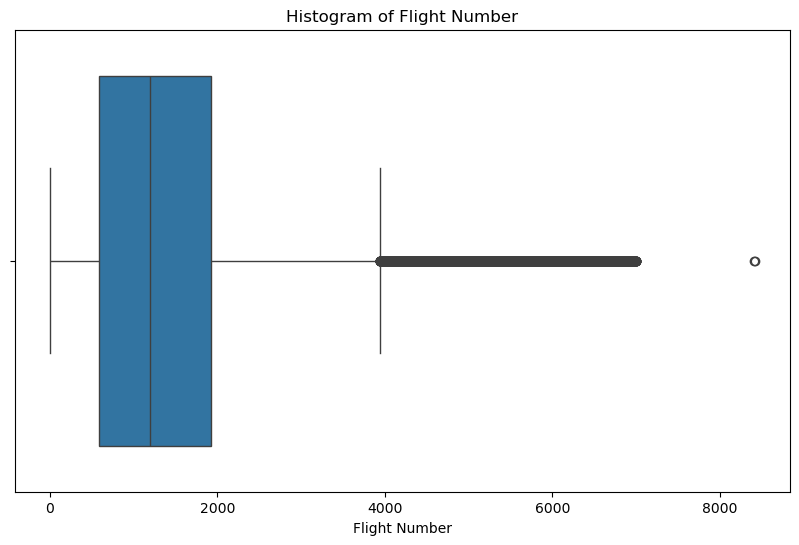

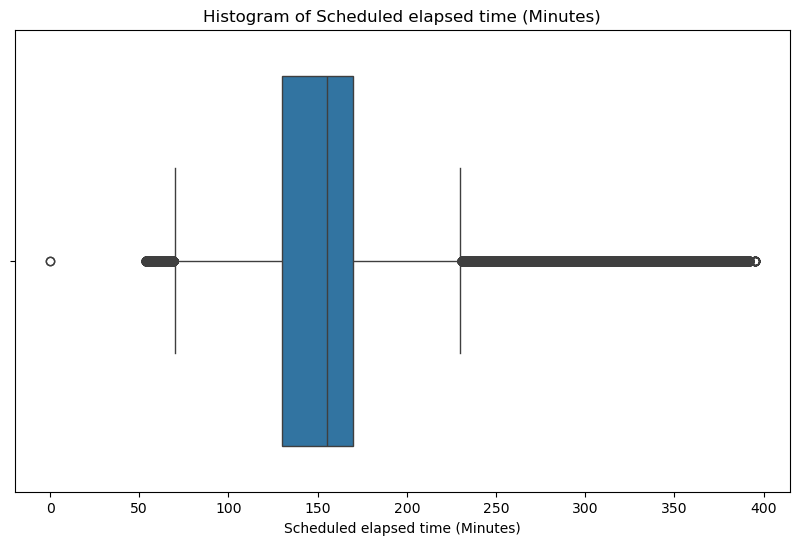

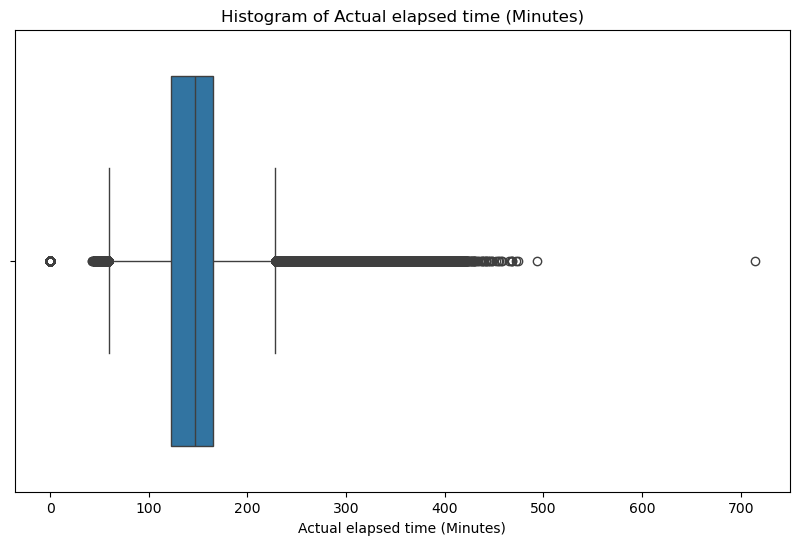

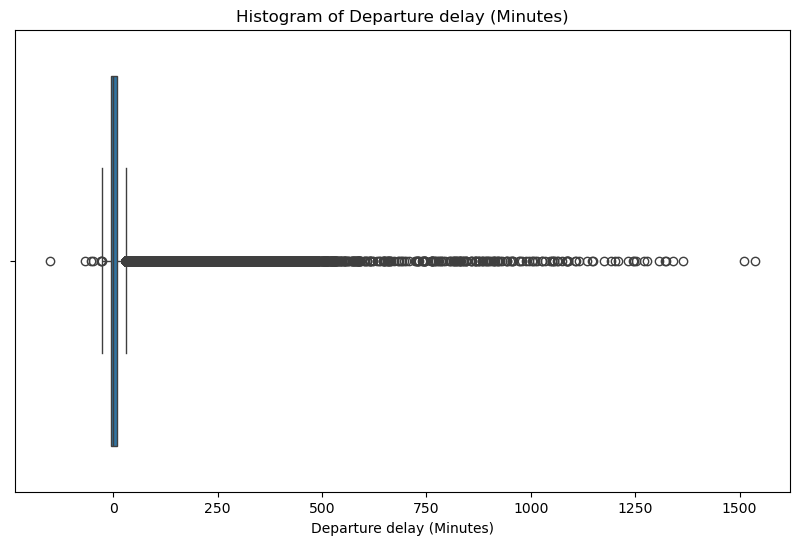

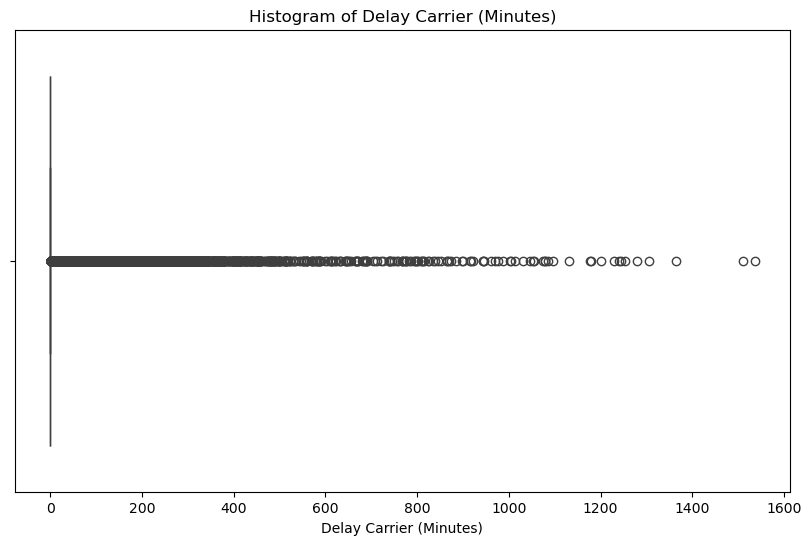

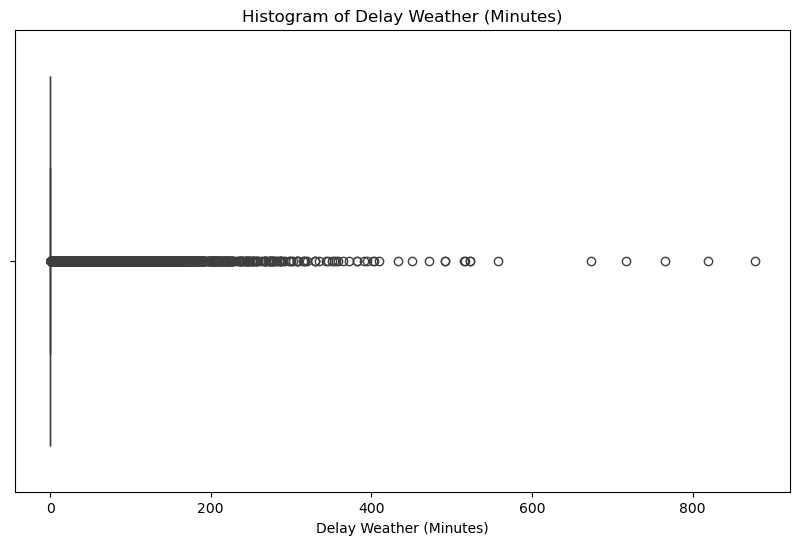

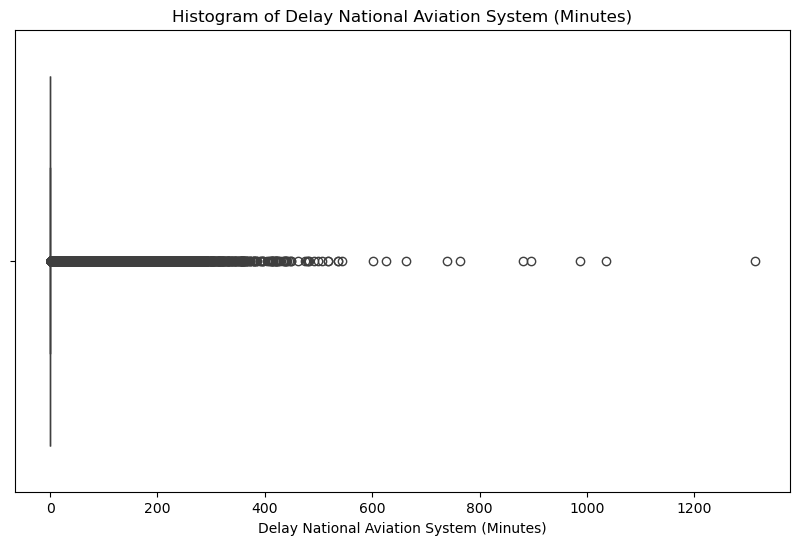

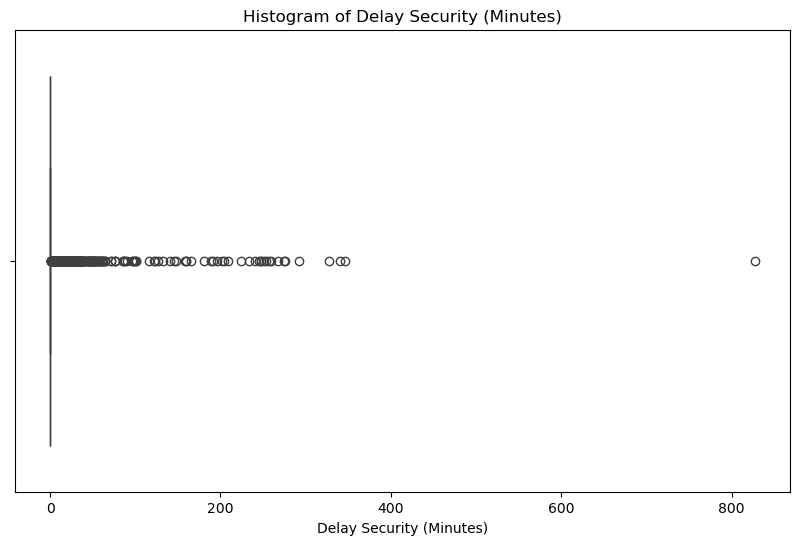

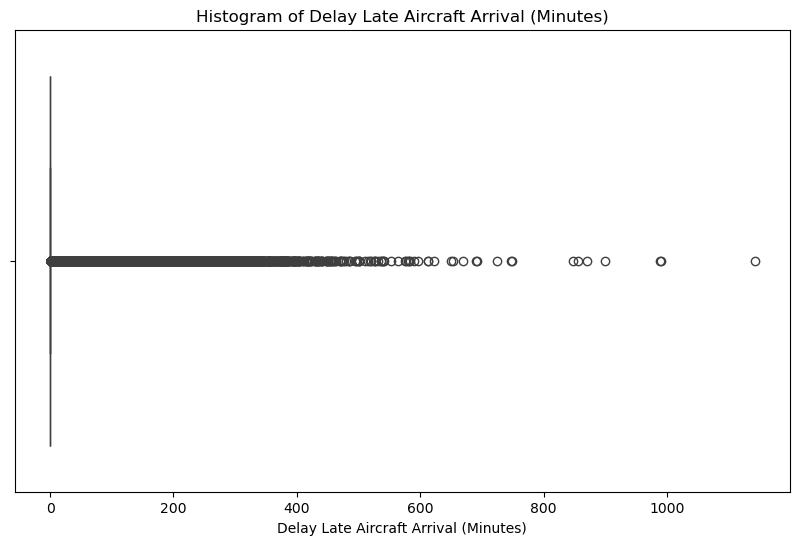

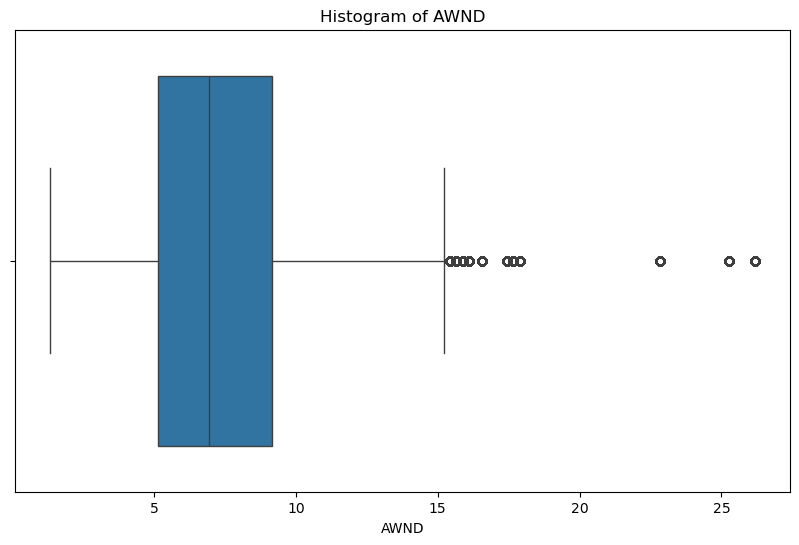

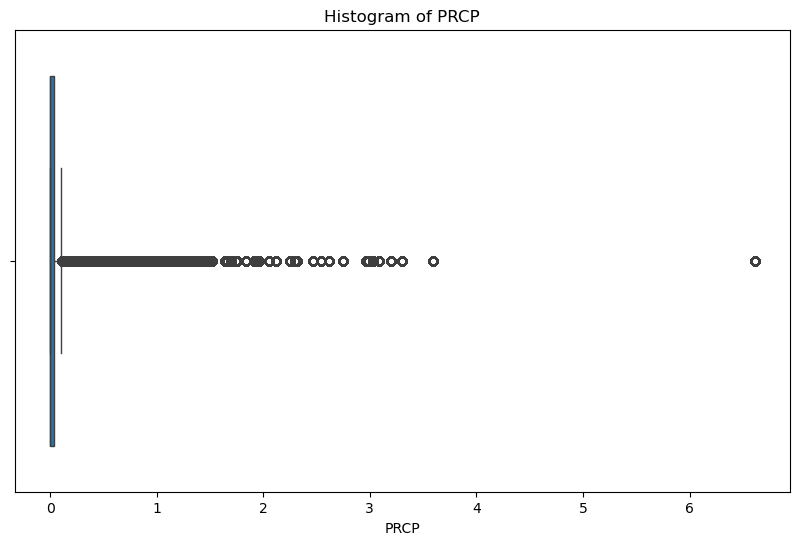

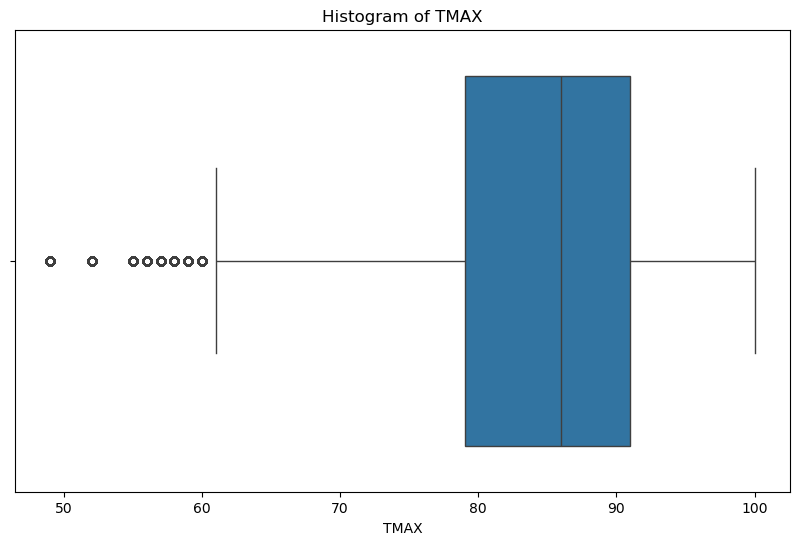

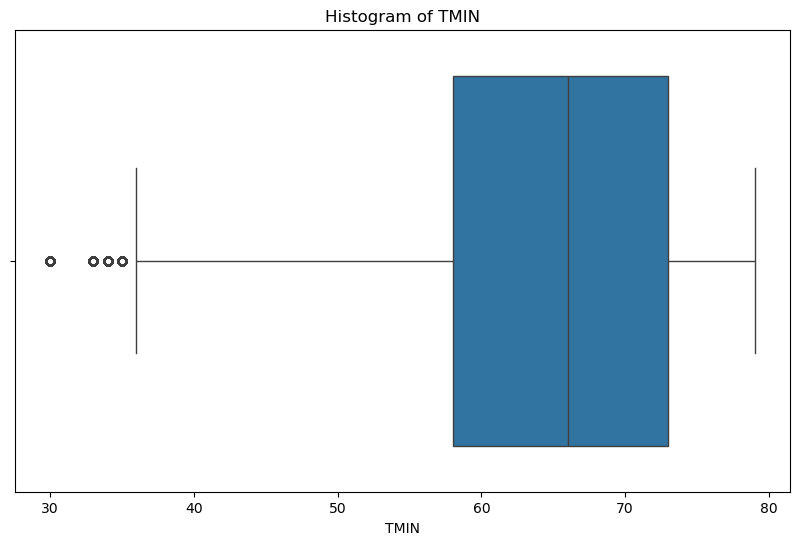

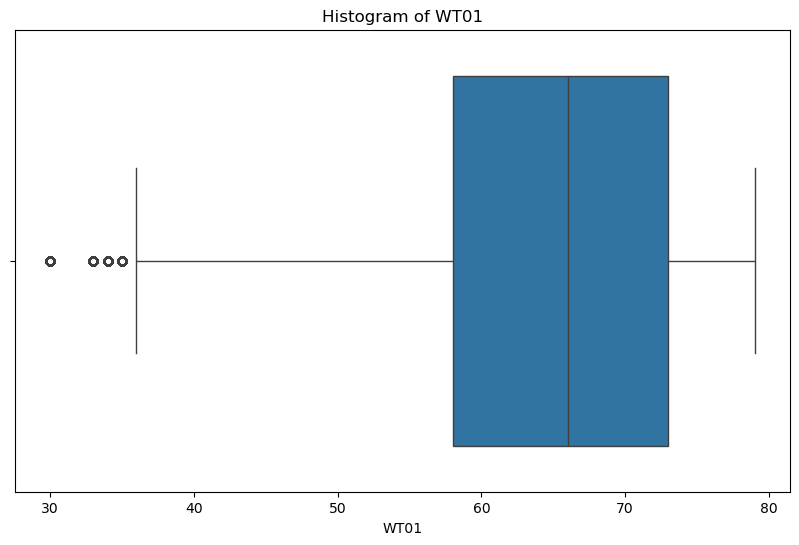

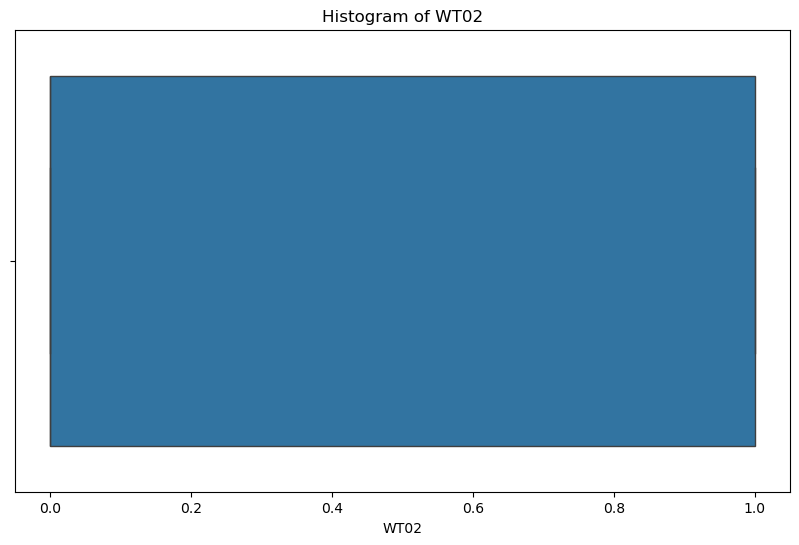

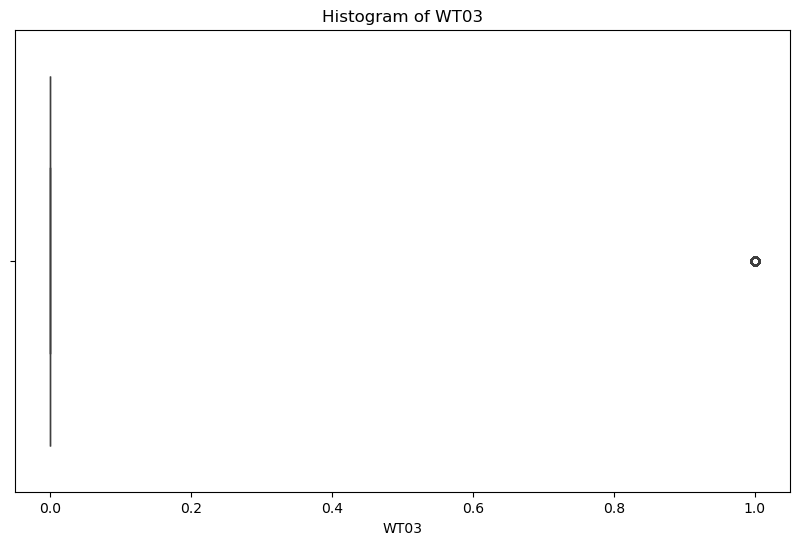

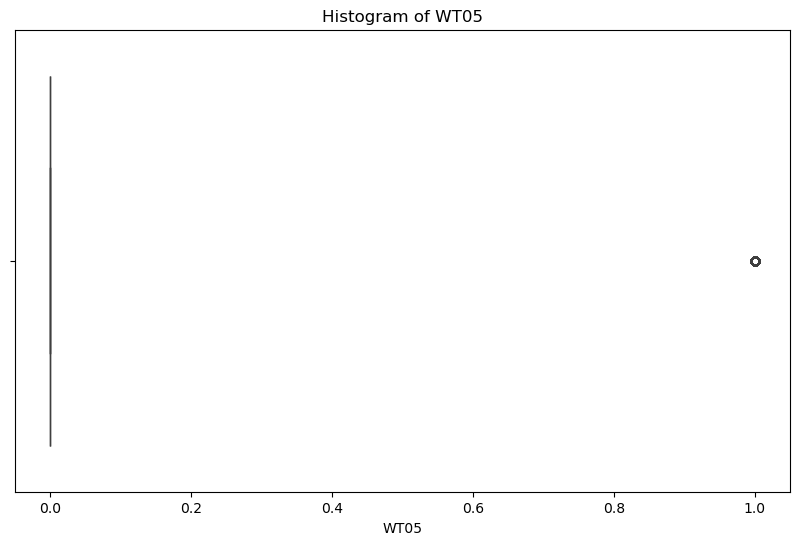

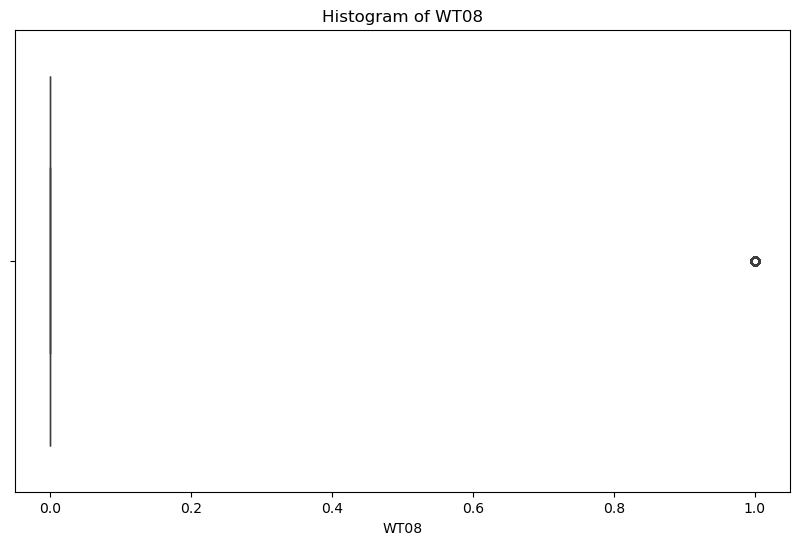

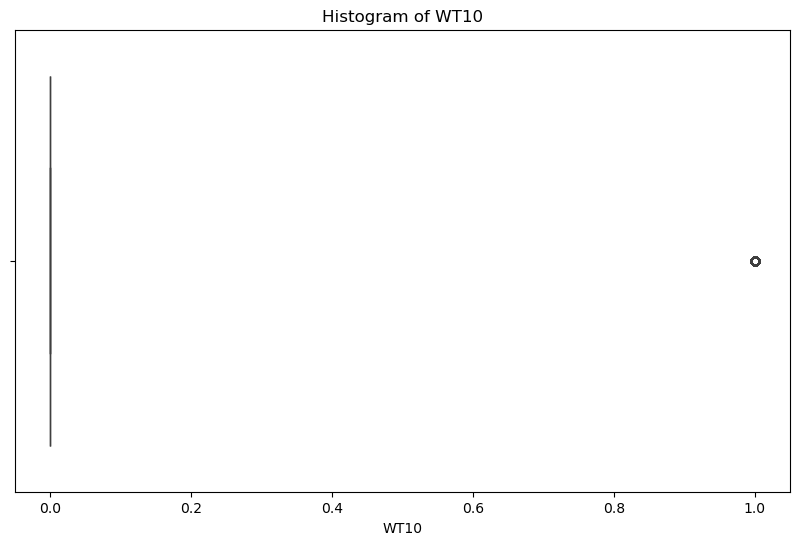

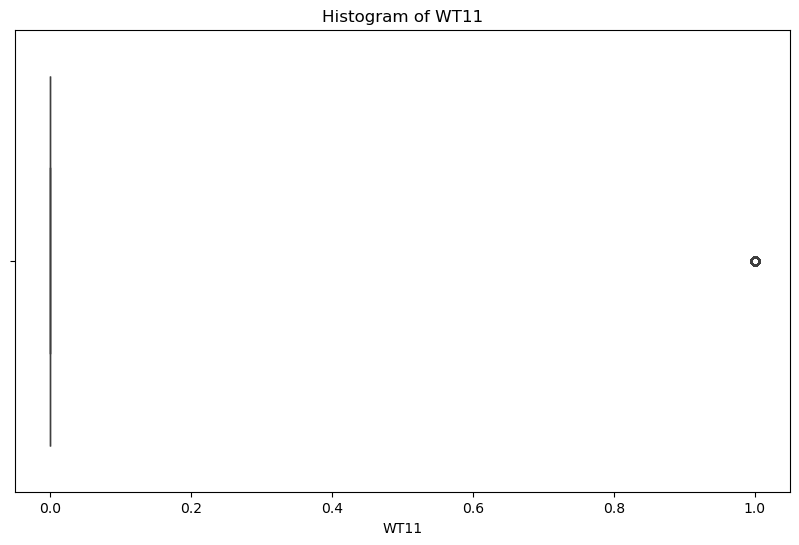

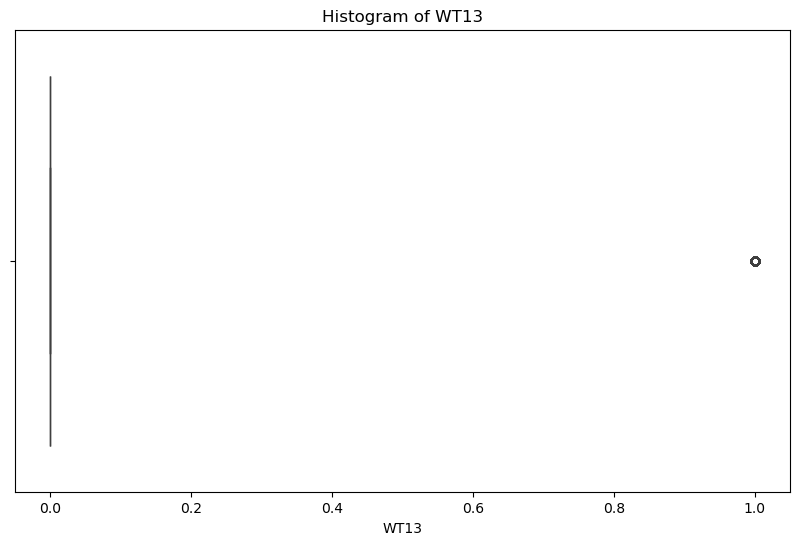

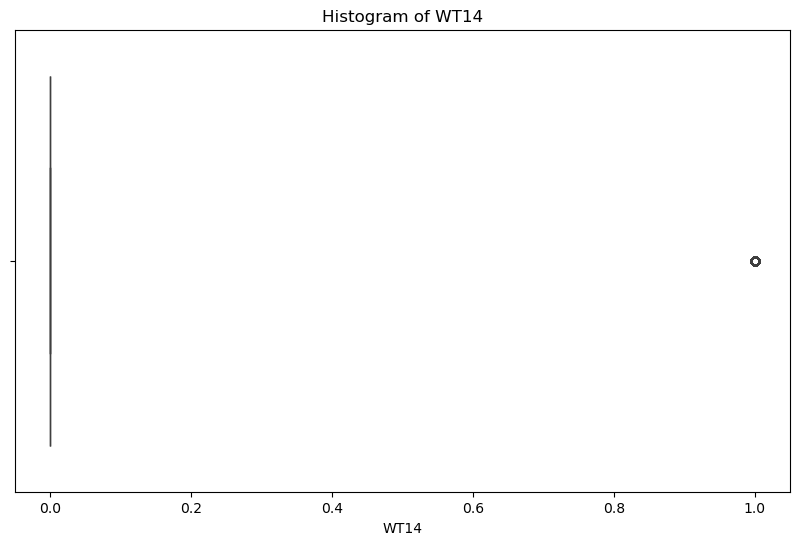

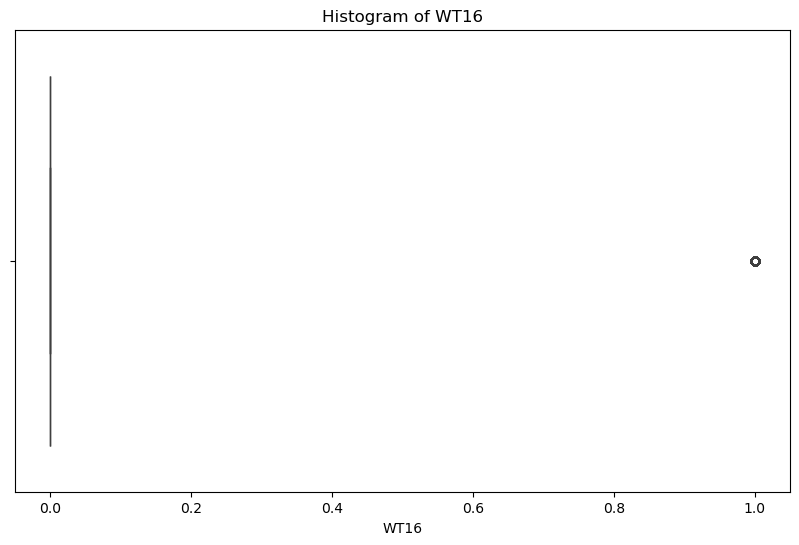

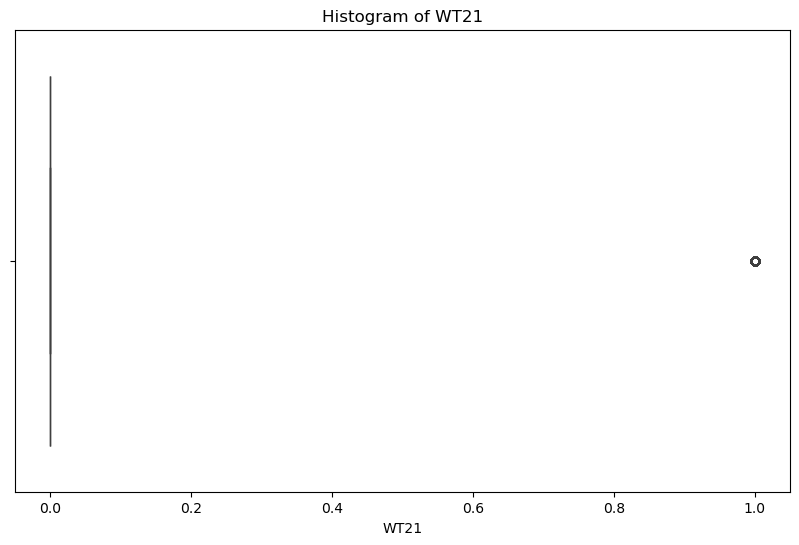

In [86]:
##Initial Box Plots to look at distribution
for i in range(len(Numeric_columns)):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=Full_Flight_Data, x=Numeric_columns[i])
    plt.title(f'Boxplot of {Numeric_columns[i]}')
    plt.show()